**Phase I**

Dimensions of dataset: (4600, 18)

First 5 rows:
            date      price  bedrooms  bathrooms  sqft_living  sqft_lot  \
0  02/05/14 0:00   313000.0         3       1.50         1340      7912   
1  02/05/14 0:00  2384000.0         5       2.50         3650      9050   
2  02/05/14 0:00   342000.0         3       2.00         1930     11947   
3  02/05/14 0:00   420000.0         3       2.25         2000      8030   
4  02/05/14 0:00   550000.0         4       2.50         1940     10500   

   floors waterfront  view  condition  sqft_above  sqft_basement  yr_built  \
0     1.5          0   0.0          3        1340              0      1955   
1     2.0          0   4.0          5        3370            280      1921   
2     1.0          0   0.0          4        1930              0      1966   
3     1.0          0   0.0          4        1000           1000      1963   
4     1.0          0   0.0          4        1140            800      1976   

   yr_renovated                

/tmp/ipython-input-2290539846.py:42: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['date'] = pd.to_datetime(df['date'], errors='coerce')


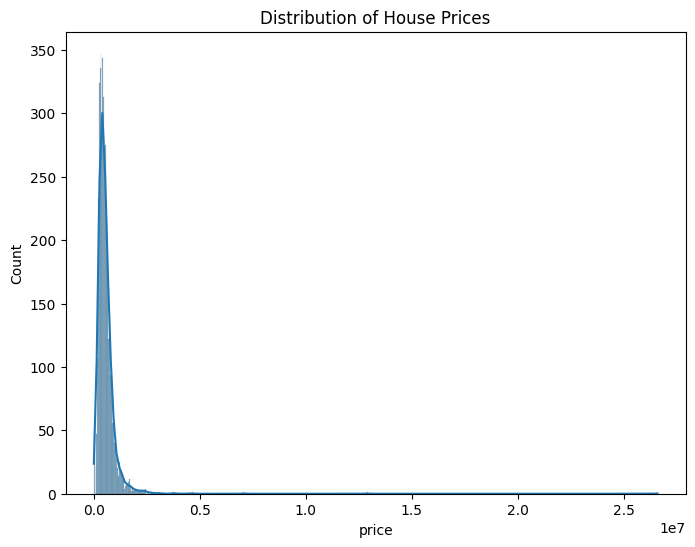

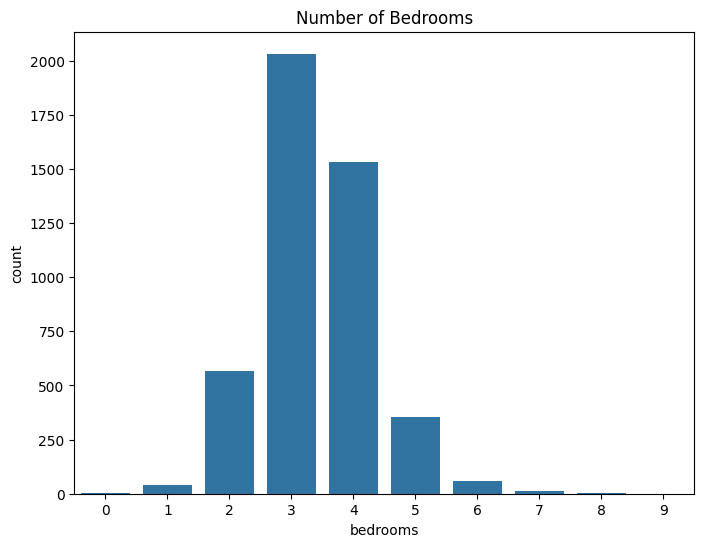

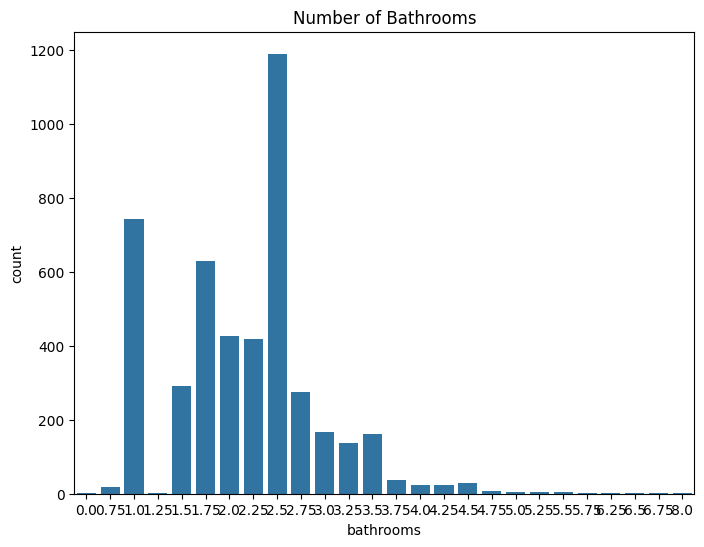

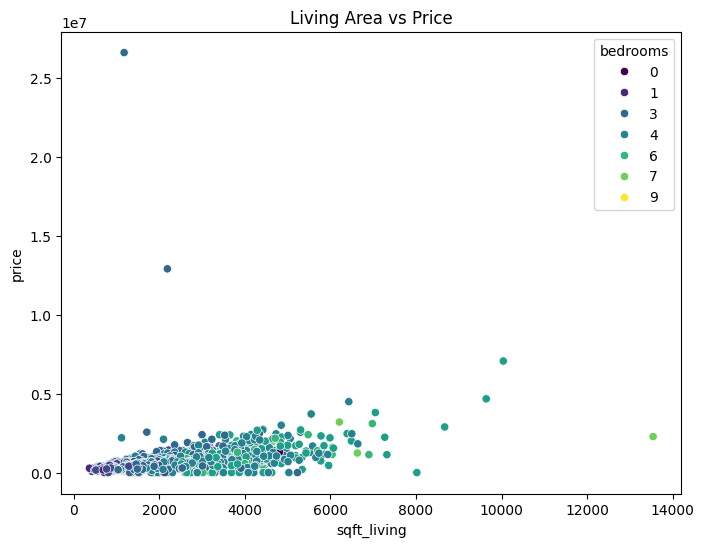

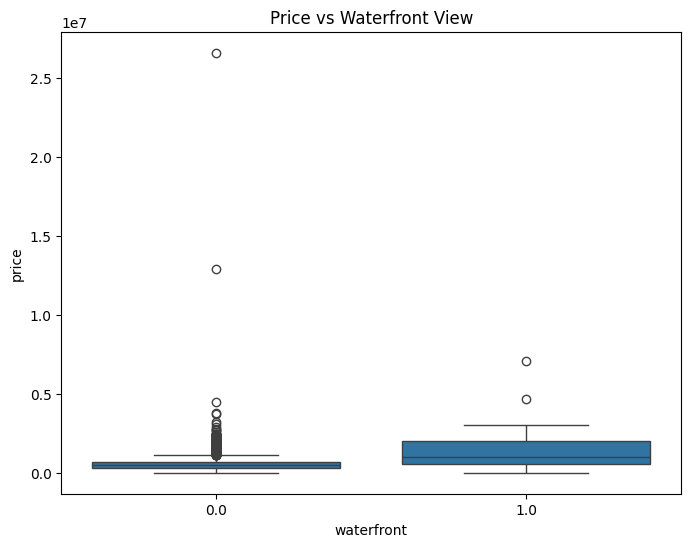

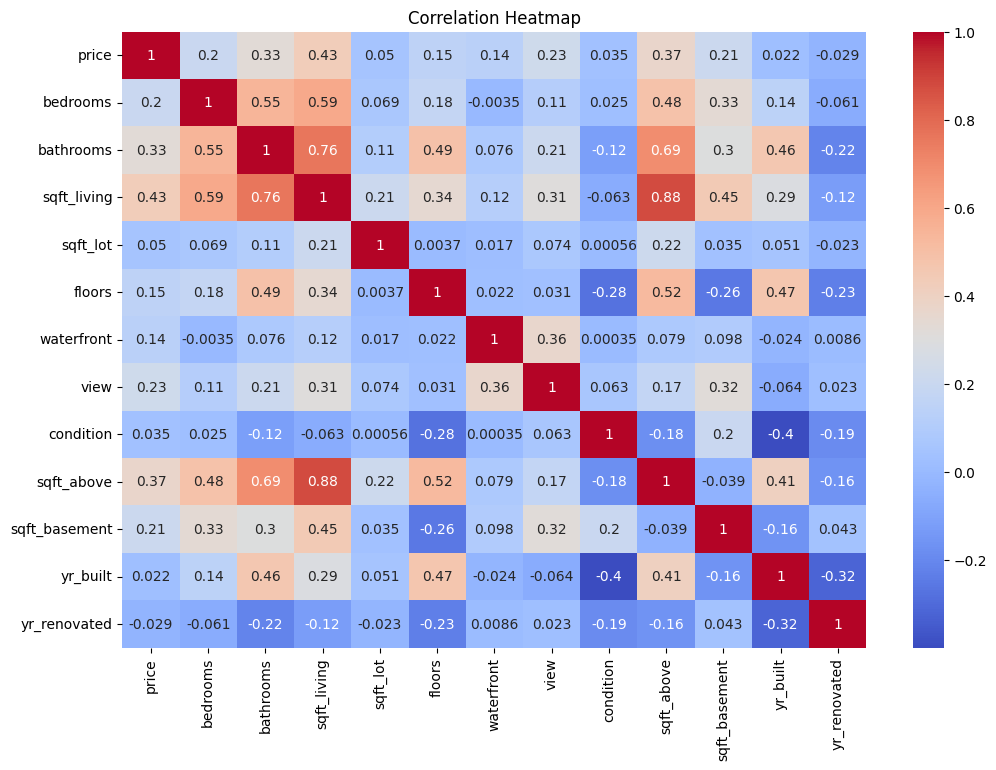

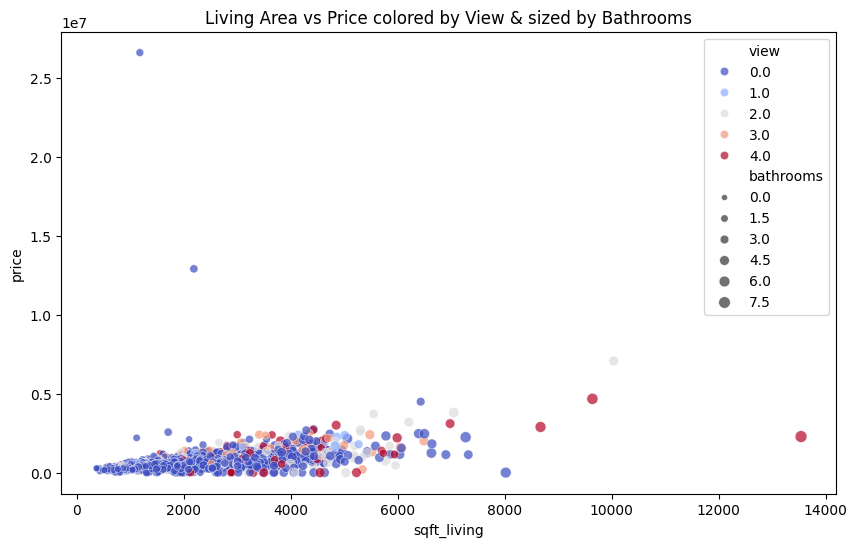

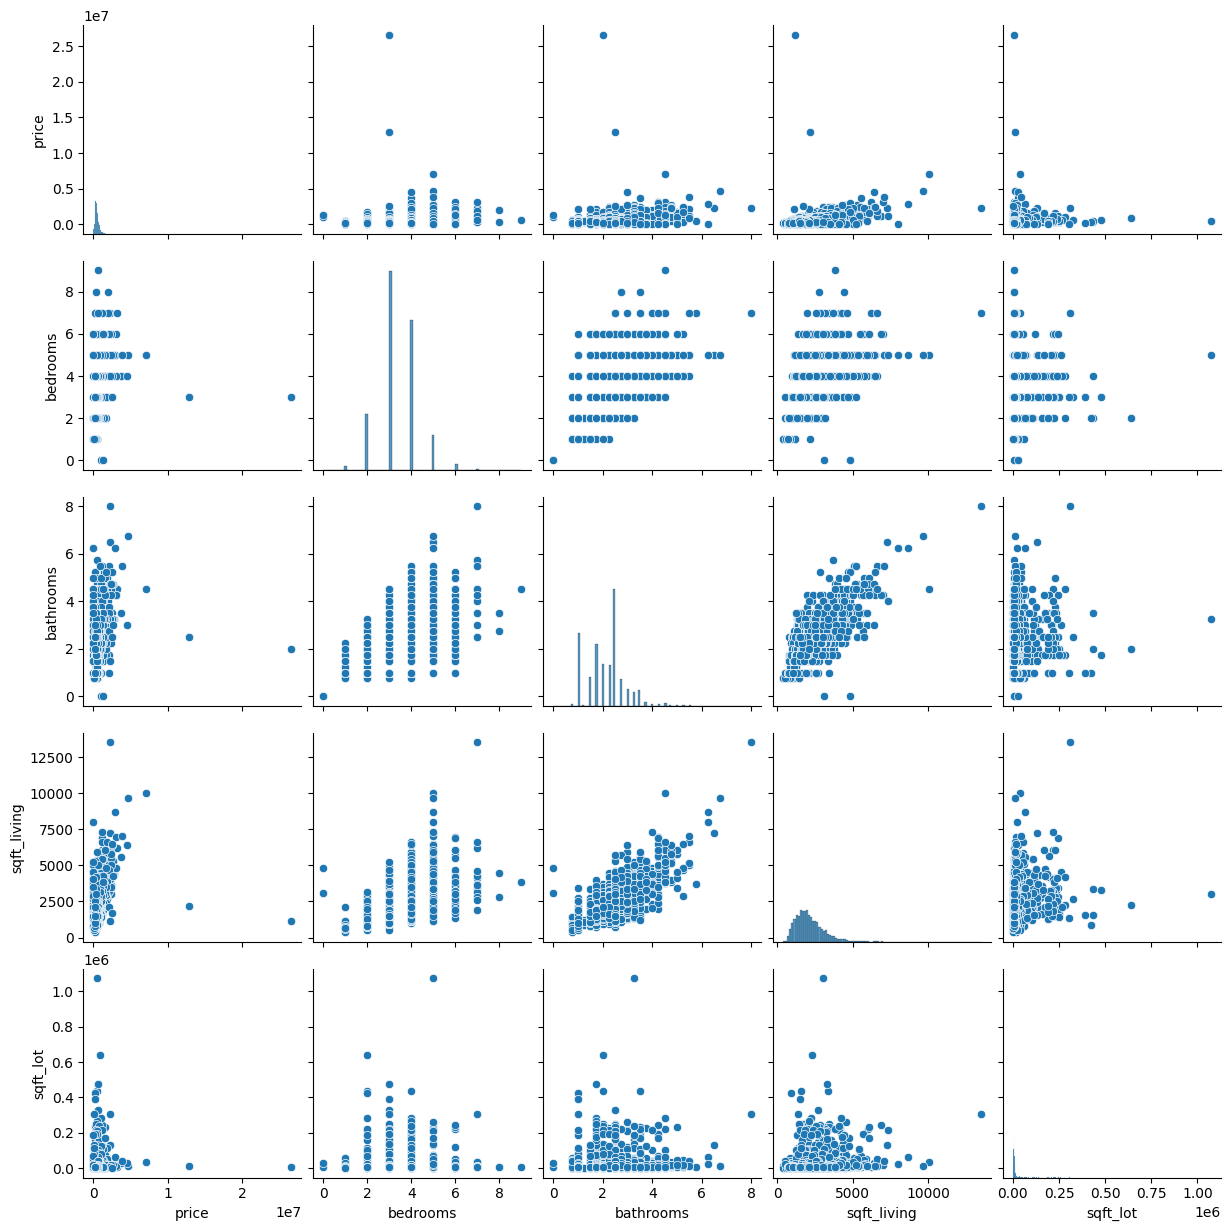

In [ ]:
# ========================
# Google Colab EDA Script
# ========================

# Install libraries
!pip install pandas matplotlib seaborn plotly

# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

# ========================
# 1. Load the dataset
# ========================
url = "https://raw.githubusercontent.com/salemprakash/EDA/main/Data/house%20price.csv"
df = pd.read_csv(url)

# ========================
# 2. Initial Exploration
# ========================
print("Dimensions of dataset:", df.shape)
print("\nFirst 5 rows:")
print(df.head())

print("\nDataset Info:")
print(df.info())

print("\nSummary Statistics:")
print(df.describe(include='all'))

# ========================
# 3. Data Handling & Cleaning
# ========================

# Replace '?' with NaN
df.replace("?", np.nan, inplace=True)

# Convert date column to datetime
df['date'] = pd.to_datetime(df['date'], errors='coerce')

# Convert numeric-like columns to numeric
for col in df.columns:
    if df[col].dtype == 'object':
        try:
            df[col] = pd.to_numeric(df[col])
        except:
            pass  # keep as object if conversion fails

# Fill NaNs: numeric with median, categorical with mode
num_cols = df.select_dtypes(include=[np.number]).columns
df[num_cols] = df[num_cols].fillna(df[num_cols].median())

cat_cols = df.select_dtypes(exclude=[np.number, 'datetime']).columns
for col in cat_cols:
    df[col] = df[col].fillna(df[col].mode()[0])

# Drop duplicates
df.drop_duplicates(inplace=True)

print("\nAfter Cleaning:")
print(df.isnull().sum())

# ========================
# 4. Univariate Analysis
# ========================
plt.figure(figsize=(8,6))
sns.histplot(df['price'], kde=True)
plt.title("Distribution of House Prices")
plt.show()

plt.figure(figsize=(8,6))
sns.countplot(x='bedrooms', data=df)
plt.title("Number of Bedrooms")
plt.show()

plt.figure(figsize=(8,6))
sns.countplot(x='bathrooms', data=df)
plt.title("Number of Bathrooms")
plt.show()

# ========================
# 5. Bivariate Analysis
# ========================
plt.figure(figsize=(8,6))
sns.scatterplot(x='sqft_living', y='price', hue='bedrooms', data=df, palette='viridis')
plt.title("Living Area vs Price")
plt.show()

plt.figure(figsize=(8,6))
sns.boxplot(x='waterfront', y='price', data=df)
plt.title("Price vs Waterfront View")
plt.show()

# Correlation heatmap (numeric only)
plt.figure(figsize=(12,8))
corr = df[num_cols].corr()
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.show()

# ========================
# 6. Multivariate Analysis
# ========================
plt.figure(figsize=(10,6))
sns.scatterplot(x='sqft_living', y='price', hue='view', size='bathrooms', data=df, palette='coolwarm', alpha=0.7)
plt.title("Living Area vs Price colored by View & sized by Bathrooms")
plt.show()

# Interactive plot with Plotly
fig = px.scatter(df, x='sqft_living', y='price', color='bedrooms',
                 size='bathrooms', hover_data=['city', 'statezip'])
fig.update_layout(title="Interactive Price Analysis")
fig.show()

# Pairplot
sns.pairplot(df[['price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot']])
plt.show()


**Phase II**

In [ ]:
# Setup: imports, options, load data
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import skew, kurtosis
from scipy import stats
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans, AgglomerativeClustering, DBSCAN
from sklearn.mixture import GaussianMixture
from sklearn.metrics import silhouette_score, adjusted_rand_score
from sklearn.neighbors import LocalOutlierFactor
from scipy.cluster.hierarchy import dendrogram, linkage
from mpl_toolkits.mplot3d import Axes3D
import warnings
warnings.filterwarnings('ignore')

plt.rcParams['figure.figsize'] = (10,6)
sns.set(style='whitegrid')

# Load dataset (new house price data)
data_url = "https://raw.githubusercontent.com/salemprakash/EDA/main/Data/house%20price.csv"
df = pd.read_csv(data_url)

print("Data loaded. Shape:", df.shape)
display(df.head())
display(df.info())

Data loaded. Shape: (4600, 18)


date      price  bedrooms  bathrooms  sqft_living  sqft_lot  \
0  02/05/14 0:00   313000.0         3       1.50         1340      7912   
1  02/05/14 0:00  2384000.0         5       2.50         3650      9050   
2  02/05/14 0:00   342000.0         3       2.00         1930     11947   
3  02/05/14 0:00   420000.0         3       2.25         2000      8030   
4  02/05/14 0:00   550000.0         4       2.50         1940     10500   

   floors waterfront  view  condition  sqft_above  sqft_basement  yr_built  \
0     1.5          0   0.0          3        1340              0      1955   
1     2.0          0   4.0          5        3370            280      1921   
2     1.0          0   0.0          4        1930              0      1966   
3     1.0          0   0.0          4        1000           1000      1963   
4     1.0          0   0.0          4        1140            800      1976   

   yr_renovated                    street       city  statezip country  
0          2005      18810 Densmore Ave N  Shoreline  WA 98133     USA  
1             0           709 W Blaine St    Seattle  WA 98119     USA  
2             0  26206-26214 143rd Ave SE       Kent  WA 98042     USA  
3             0           857 170th Pl NE   Bellevue  WA 98008     USA  
4          1992         9105 170th Ave NE    Redmond  WA 98052     USA

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4600 entries, 0 to 4599
Data columns (total 18 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   date           4600 non-null   object 
 1   price          4600 non-null   float64
 2   bedrooms       4600 non-null   int64  
 3   bathrooms      4600 non-null   float64
 4   sqft_living    4600 non-null   int64  
 5   sqft_lot       4600 non-null   int64  
 6   floors         4600 non-null   float64
 7   waterfront     4596 non-null   object 
 8   view           4599 non-null   float64
 9   condition      4600 non-null   int64  
 10  sqft_above     4600 non-null   int64  
 11  sqft_basement  4600 non-null   int64  
 12  yr_built       4600 non-null   int64  
 13  yr_renovated   4600 non-null   int64  
 14  street         4600 non-null   object 
 15  city           4600 non-null   object 
 16  statezip       4600 non-null   object 
 17  country        4599 non-null   object 
dtypes: float

None

In [ ]:
import pandas as pd

# Load dataset
url = "https://raw.githubusercontent.com/salemprakash/EDA/main/Data/house%20price.csv"
df = pd.read_csv(url)

# Quick summary and cleaning plan
print("Dataset shape:", df.shape)
print("\nColumns and dtypes:")
display(df.dtypes)

# Missing values
print("\nMissing values count:")
missing = df.isnull().sum().sort_values(ascending=False)
display(missing[missing > 0])

# Duplicates
print("\nDuplicate rows:", df.duplicated().sum())

# Percentage of missing values
print("\n% Missing values per column:")
pct_missing = (df.isnull().mean() * 100).round(2).sort_values(ascending=False)
display(pct_missing)

# Example: if you want to drop columns with >60% missing (uncomment to apply)
# cols_to_drop = pct_missing[pct_missing > 60].index.tolist()
# df.drop(columns=cols_to_drop, inplace=True)
# print("Dropped columns:", cols_to_drop)

Dataset shape: (4600, 18)

Columns and dtypes:


date              object
price            float64
bedrooms           int64
bathrooms        float64
sqft_living        int64
sqft_lot           int64
floors           float64
waterfront        object
view             float64
condition          int64
sqft_above         int64
sqft_basement      int64
yr_built           int64
yr_renovated       int64
street            object
city              object
statezip          object
country           object
dtype: object


Missing values count:


waterfront    4
view          1
country       1
dtype: int64


Duplicate rows: 0

% Missing values per column:


waterfront       0.09
view             0.02
country          0.02
date             0.00
price            0.00
bedrooms         0.00
sqft_lot         0.00
sqft_living      0.00
floors           0.00
bathrooms        0.00
condition        0.00
sqft_above       0.00
yr_built         0.00
sqft_basement    0.00
yr_renovated     0.00
street           0.00
city             0.00
statezip         0.00
dtype: float64

In [ ]:
import numpy as np
from scipy.stats import kurtosis

# Identify numeric and categorical columns
numeric_cols = df.select_dtypes(include=[np.number]).columns.tolist()
cat_cols = df.select_dtypes(include=['object', 'category']).columns.tolist()
print("Numeric columns:", numeric_cols)
print("Categorical columns:", cat_cols)

# Descriptive statistics with skew & kurtosis
desc = df[numeric_cols].describe().T
desc['skew'] = df[numeric_cols].skew().round(4)
desc['kurtosis'] = df[numeric_cols].apply(kurtosis).round(4)

# Add quantiles
q = df[numeric_cols].quantile([0.01,0.05,0.25,0.5,0.75,0.95,0.99]).T
desc = desc.join(q)

# Calculate IQR and outlier counts (1.5*IQR rule)
desc['IQR'] = desc[0.75] - desc[0.25]

def count_outliers(col):
    s = df[col].dropna()
    q1 = s.quantile(0.25)
    q3 = s.quantile(0.75)
    iqr = q3 - q1
    low = q1 - 1.5 * iqr
    high = q3 + 1.5 * iqr
    return ((s < low) | (s > high)).sum()

desc['outlier_count_1.5IQR'] = [count_outliers(c) for c in desc.index]

print("\nDescriptive Statistics with Outliers:")
display(desc)

# Show columns with highest skew
print("\nTop skewed numeric features:")
display(desc['skew'].abs().sort_values(ascending=False).head(10))

# Quick look at categorical distributions
print("\nCategorical value counts (top 5 each):")
for c in cat_cols:
    print(f"\n{c}:")
    display(df[c].value_counts().head(5))

Numeric columns: ['price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors', 'view', 'condition', 'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated']
Categorical columns: ['date', 'waterfront', 'street', 'city', 'statezip', 'country']

Descriptive Statistics with Outliers:


count           mean            std     min        25%  \
price          4600.0  551962.988473  563834.702547     0.0  322875.00   
bedrooms       4600.0       3.400870       0.908848     0.0       3.00   
bathrooms      4600.0       2.160815       0.783781     0.0       1.75   
sqft_living    4600.0    2139.346957     963.206916   370.0    1460.00   
sqft_lot       4600.0   14852.516087   35884.436145   638.0    5000.75   
floors         4600.0       1.512065       0.538288     1.0       1.00   
view           4599.0       0.240705       0.778481     0.0       0.00   
condition      4600.0       3.451739       0.677230     1.0       3.00   
sqft_above     4600.0    1827.265435     862.168977   370.0    1190.00   
sqft_basement  4600.0     312.081522     464.137228     0.0       0.00   
yr_built       4600.0    1970.786304      29.731848  1900.0    1951.00   
yr_renovated   4600.0     808.608261     979.414536     0.0       0.00   

                        50%        75%         max     skew   kurtosis  \
price          460943.46155  654962.50  26590000.0  24.7909  1043.2160   
bedrooms            3.00000       4.00         9.0   0.4564     1.2327   
bathrooms           2.25000       2.50         8.0   0.6160     1.8626   
sqft_living      1980.00000    2620.00     13540.0   1.7235     8.2814   
sqft_lot         7683.00000   11001.25   1074218.0  11.3071   219.6328   
floors              1.50000       2.00         3.5   0.5514    -0.5396   
view                0.00000       0.00         4.0   3.3411        NaN   
condition           3.00000       4.00         5.0   0.9591     0.1962   
sqft_above       1590.00000    2300.00      9410.0   1.4942     4.0644   
sqft_basement       0.00000     610.00      4820.0   1.6427     4.0766   
yr_built         1976.00000    1997.00      2014.0  -0.5022    -0.6707   
yr_renovated        0.00000    1999.00      2014.0   0.3859    -1.8504   

                  0.01      0.05       0.25           0.5       0.75  \
price             0.00  200000.0  322875.00  460943.46155  654962.50   
bedrooms          2.00       2.0       3.00       3.00000       4.00   
bathrooms         1.00       1.0       1.75       2.25000       2.50   
sqft_living     720.00     950.0    1460.00    1980.00000    2620.00   
sqft_lot       1026.95    1690.8    5000.75    7683.00000   11001.25   
floors            1.00       1.0       1.00       1.50000       2.00   
view              0.00       0.0       0.00       0.00000       0.00   
condition         3.00       3.0       3.00       3.00000       4.00   
sqft_above      709.90     860.0    1190.00    1590.00000    2300.00   
sqft_basement     0.00       0.0       0.00       0.00000     610.00   
yr_built       1903.00    1913.0    1951.00    1976.00000    1997.00   
yr_renovated      0.00       0.0       0.00       0.00000    1999.00   

                    0.95        0.99        IQR  outlier_count_1.5IQR  
price          1184050.0  2005220.00  332087.50                   240  
bedrooms             5.0        6.00       1.00                   118  
bathrooms            3.5        4.50       0.75                   141  
sqft_living       3870.0     5180.10    1160.00                   129  
sqft_lot         43560.0   203455.49    6000.50                   541  
floors               2.0        3.00       1.00                     0  
view                 2.0        4.00       0.00                   460  
condition            5.0        5.00       1.00                     6  
sqft_above        3440.0     4460.10    1110.00                   116  
sqft_basement     1210.0     1700.20     610.00                    82  
yr_built          2009.0     2014.00      46.00                     0  
yr_renovated      2011.0     2014.00    1999.00                     0


Top skewed numeric features:


price            24.7909
sqft_lot         11.3071
view              3.3411
sqft_living       1.7235
sqft_basement     1.6427
sqft_above        1.4942
condition         0.9591
bathrooms         0.6160
floors            0.5514
yr_built          0.5022
Name: skew, dtype: float64


Categorical value counts (top 5 each):

date:


date
23/06/14 0:00    142
25/06/14 0:00    131
26/06/14 0:00    131
08/07/14 0:00    127
09/07/14 0:00    121
Name: count, dtype: int64


waterfront:


waterfront
0    4561
1      33
?       2
Name: count, dtype: int64


street:


street
2520 Mulberry Walk NE    4
2500 Mulberry Walk NE    3
2803 SW Bataan St        2
8354 11th Ave NW         2
6008 8th Ave NE          2
Name: count, dtype: int64


city:


city
Seattle     1573
Renton       293
Bellevue     286
Redmond      235
Kirkland     187
Name: count, dtype: int64


statezip:


statezip
WA 98103    148
WA 98052    135
WA 98117    132
WA 98115    130
WA 98006    110
Name: count, dtype: int64


country:


country
USA    4597
?         2
Name: count, dtype: int64

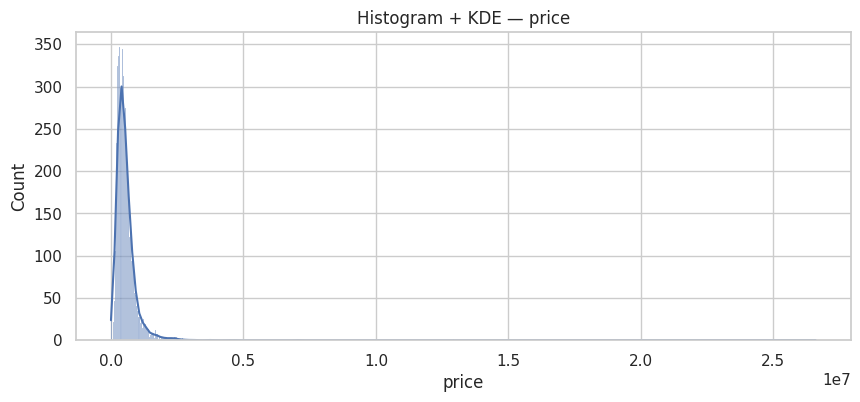

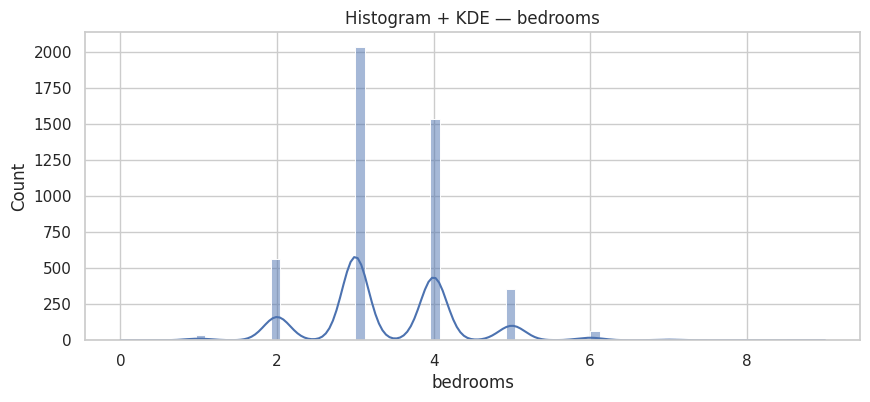

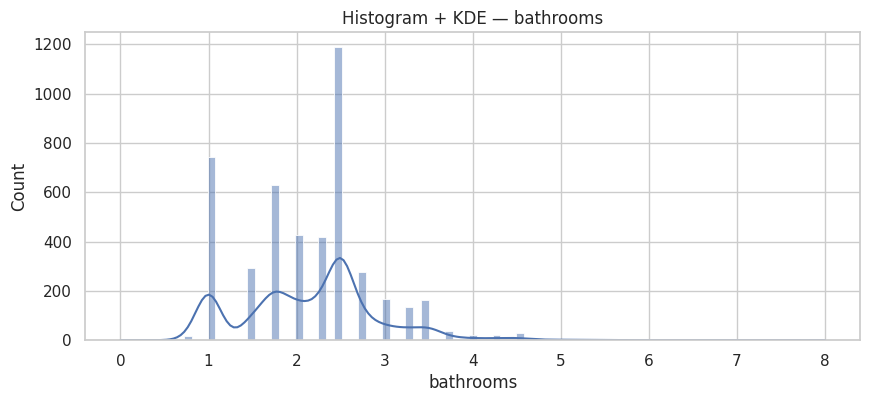

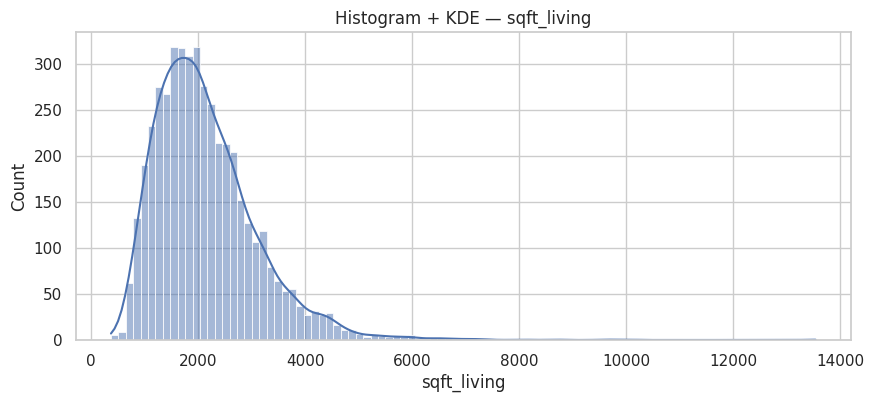

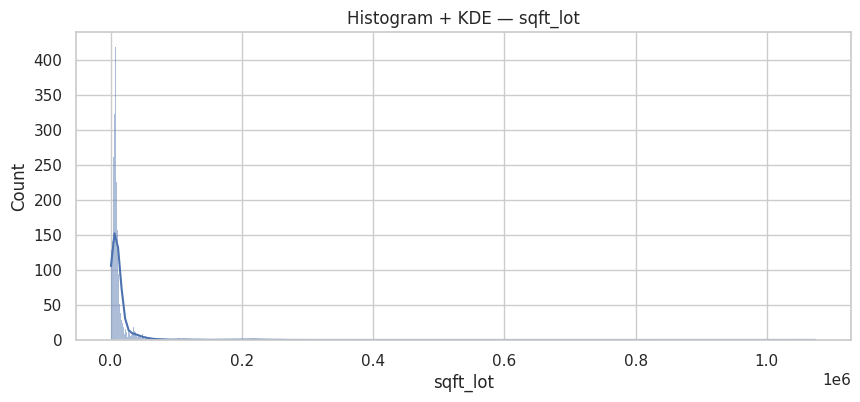

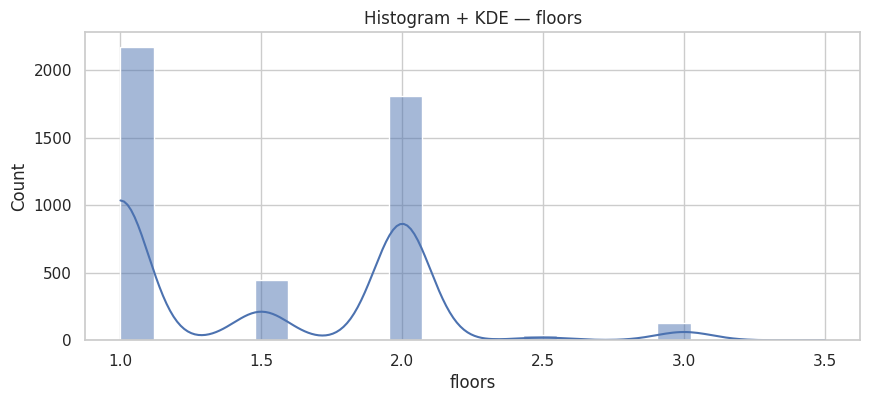

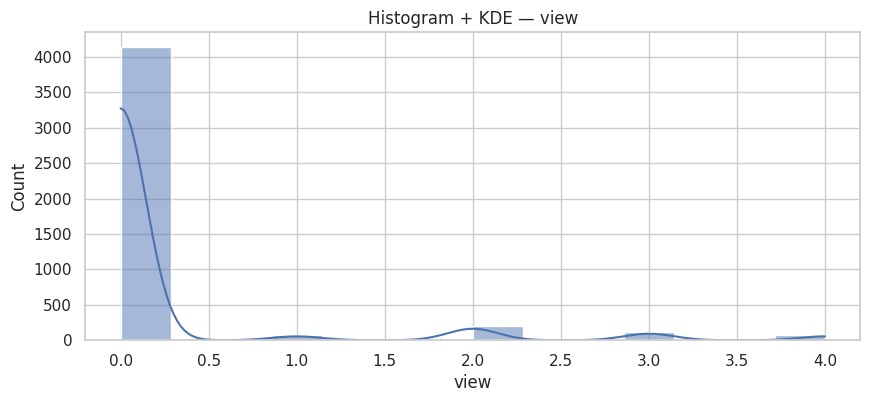

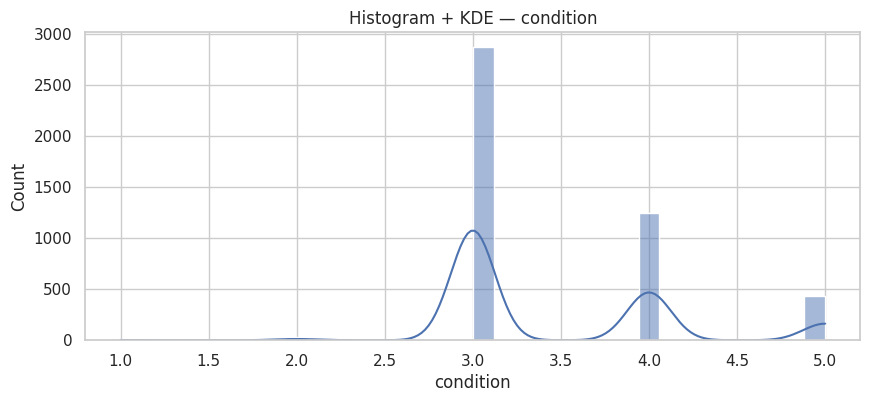

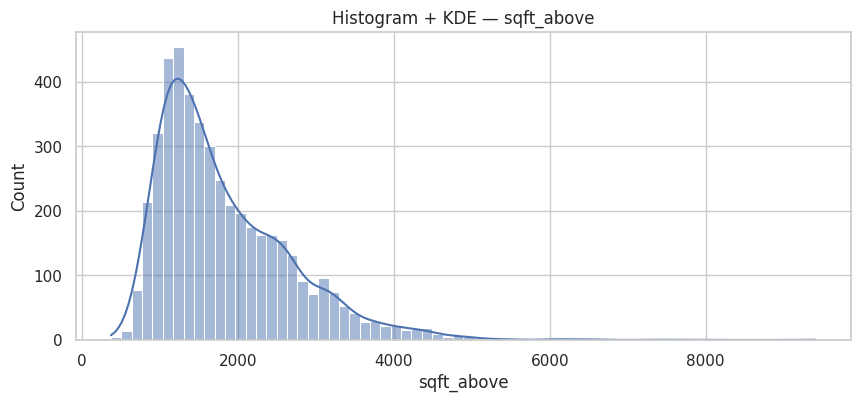

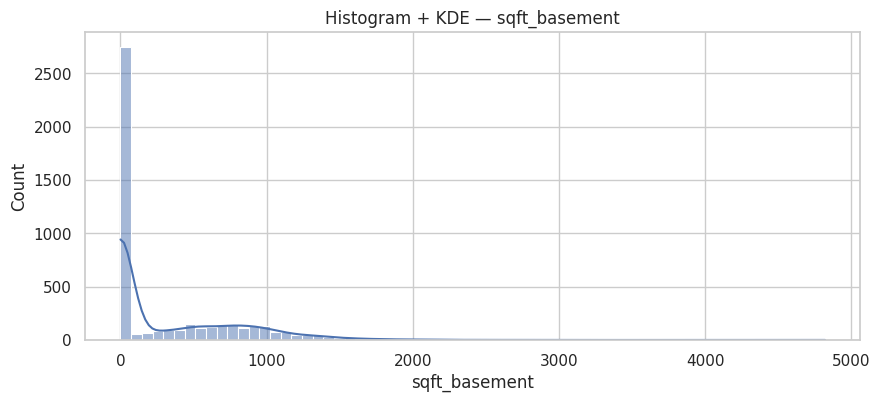

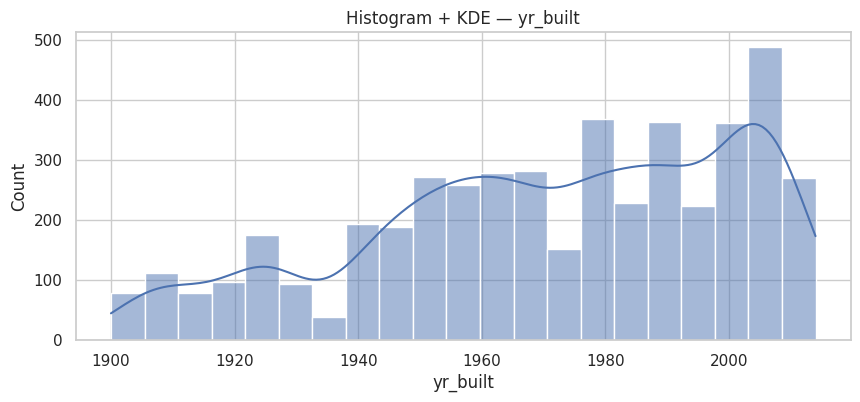

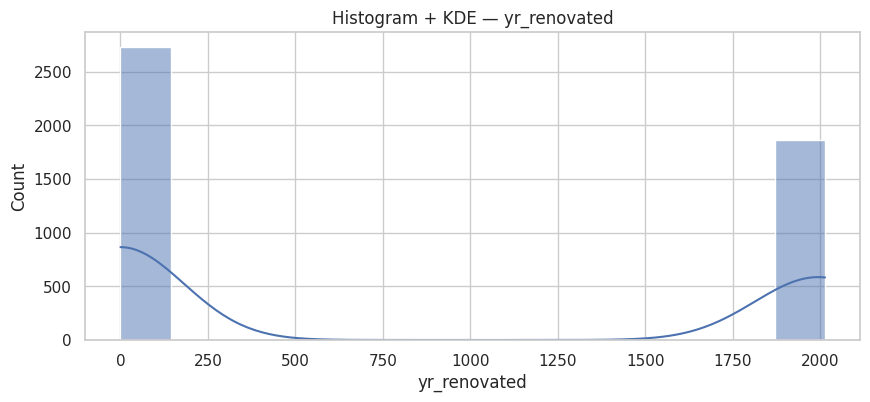

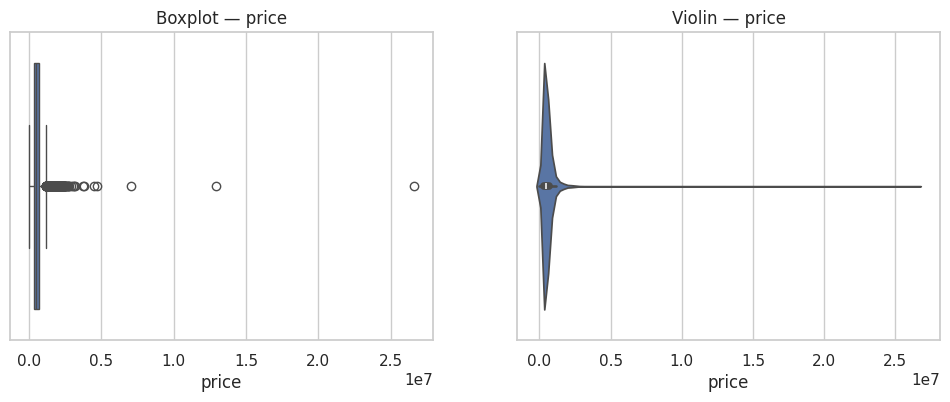

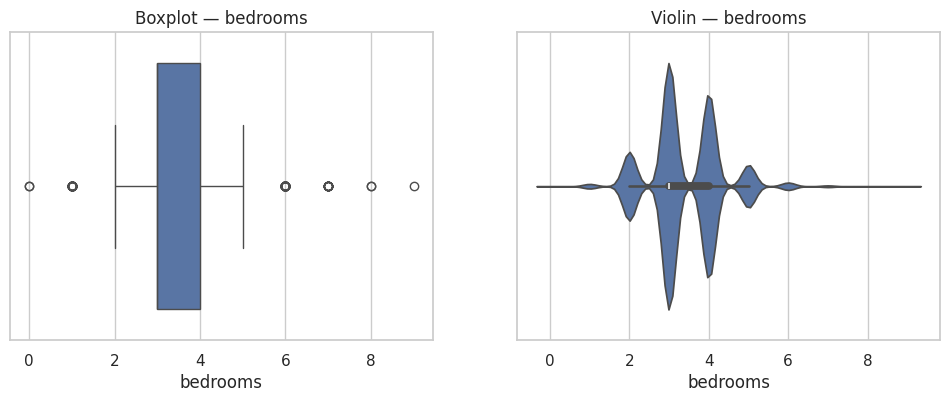

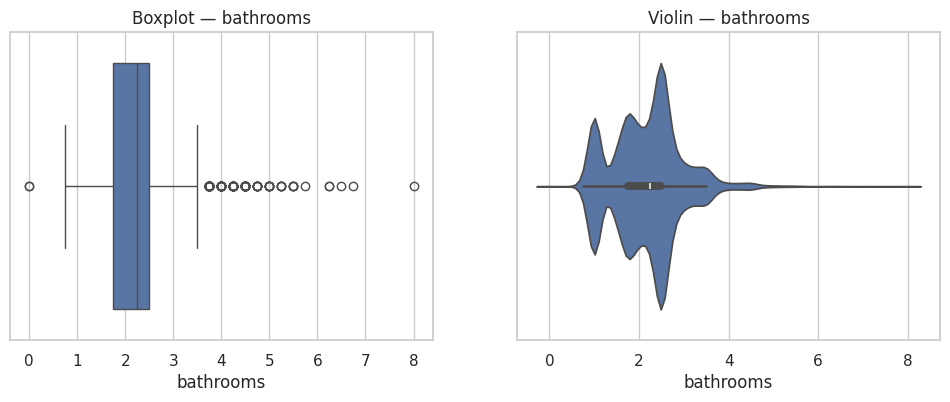

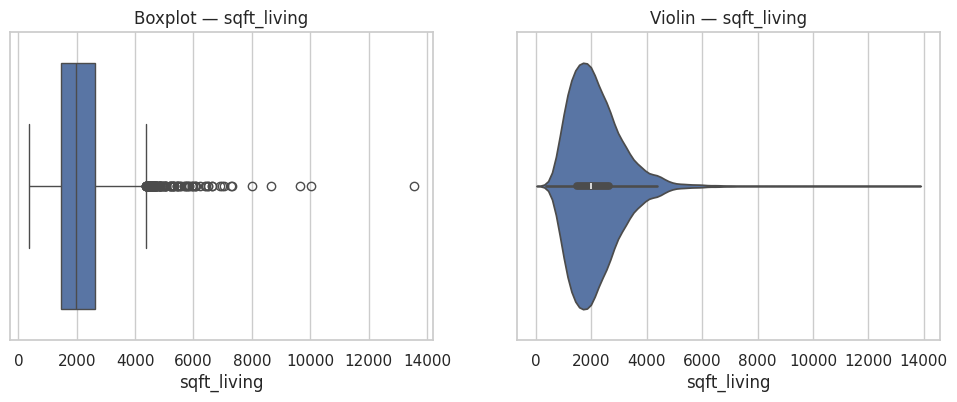

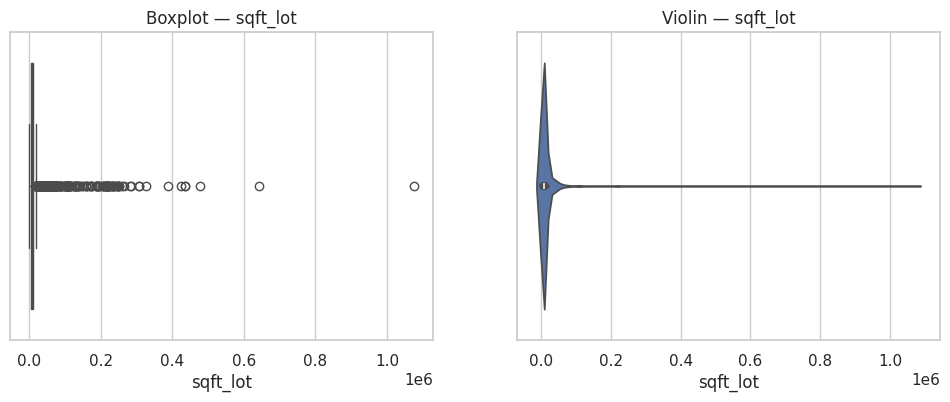

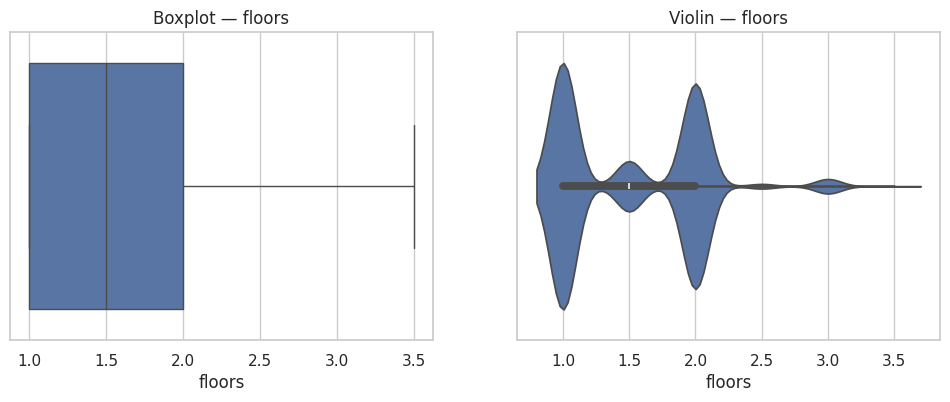

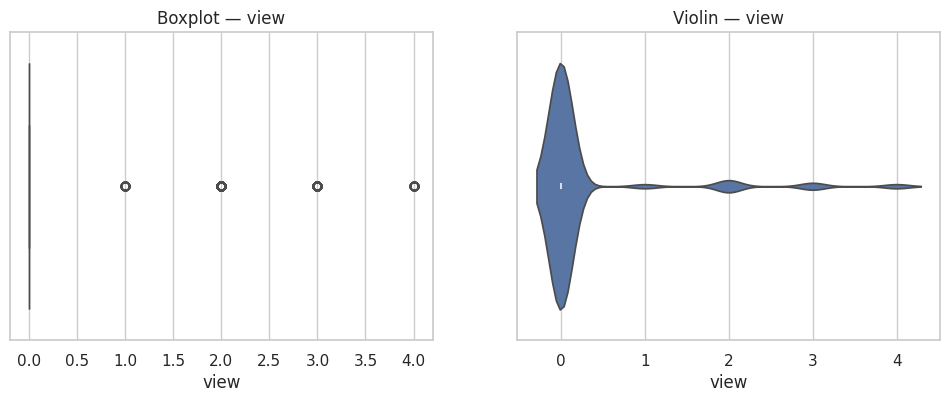

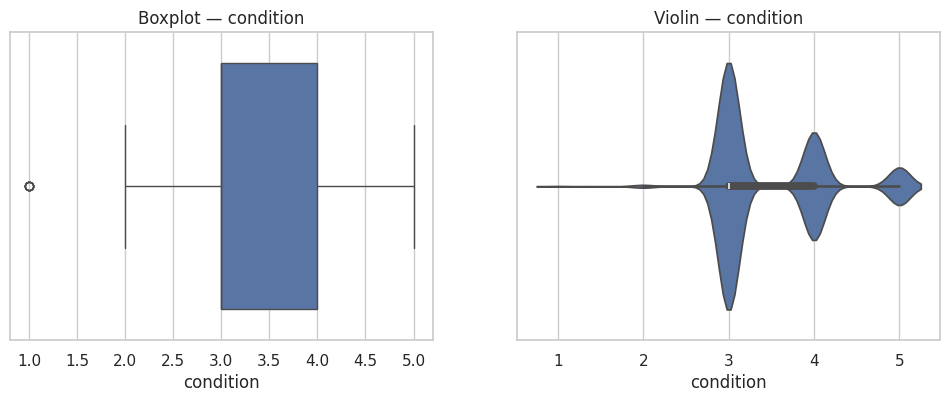

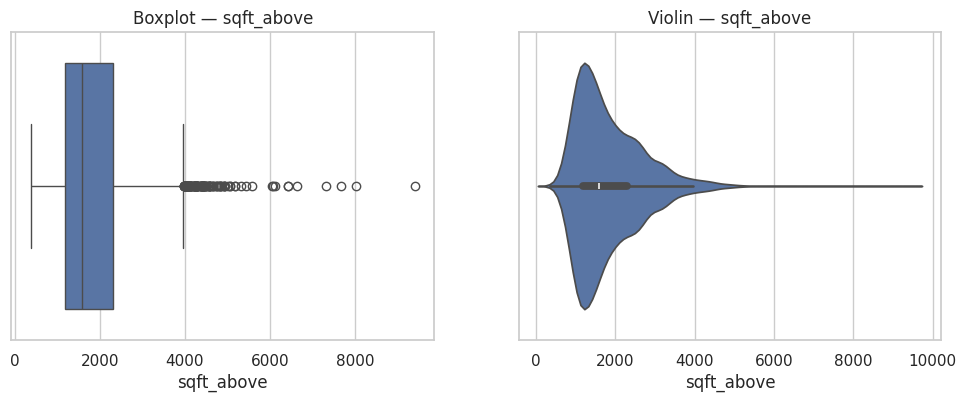

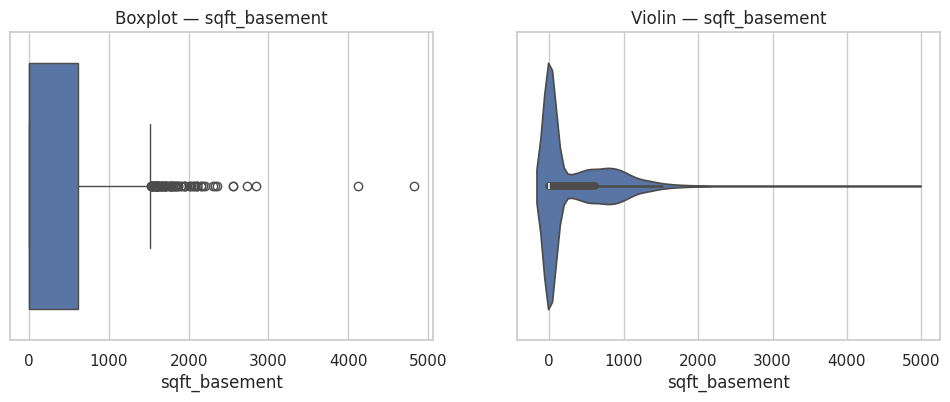

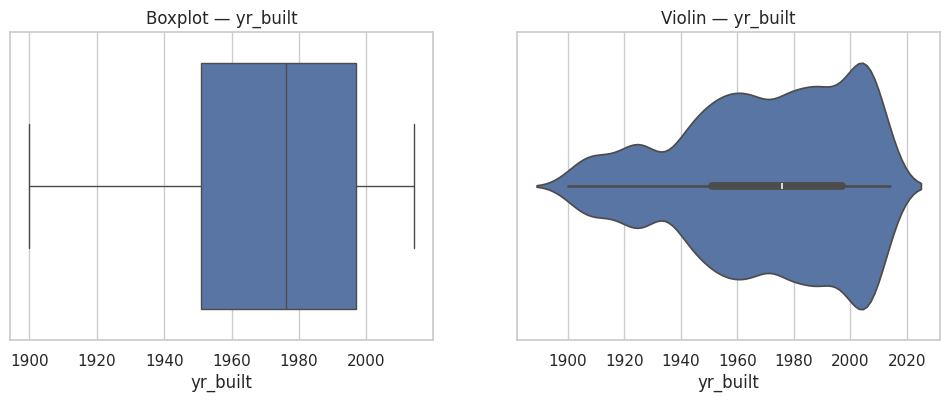

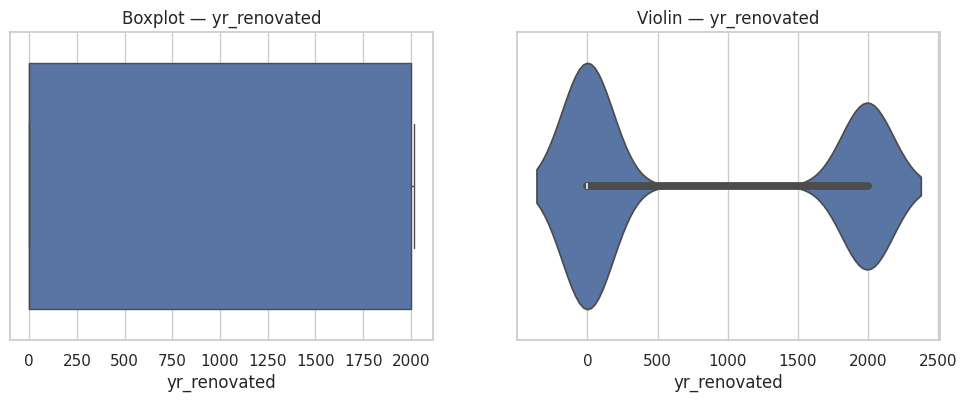


Value counts for date (top 10):


date
23/06/14 0:00    142
25/06/14 0:00    131
26/06/14 0:00    131
08/07/14 0:00    127
09/07/14 0:00    121
24/06/14 0:00    120
20/05/14 0:00    116
01/07/14 0:00    116
17/06/14 0:00    113
28/05/14 0:00    111
Name: count, dtype: int64

⚠️ Skipping barplot for date (too many unique values)

Value counts for waterfront (top 10):


waterfront
0      4561
1        33
NaN       4
?         2
Name: count, dtype: int64

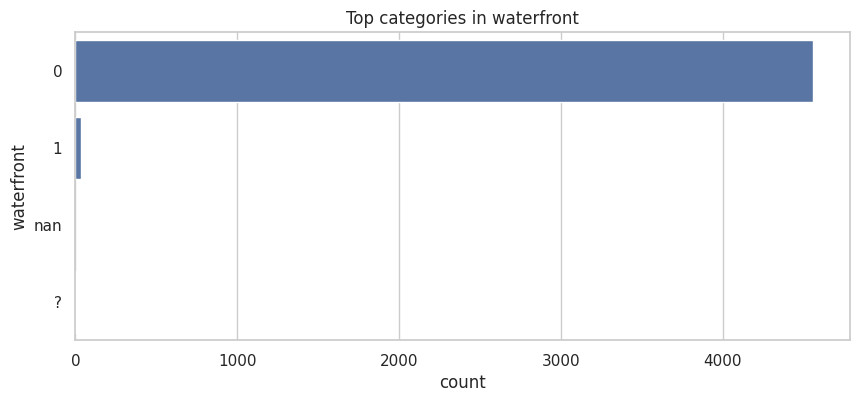


Value counts for street (top 10):


street
2520 Mulberry Walk NE    4
2500 Mulberry Walk NE    3
2803 SW Bataan St        2
8354 11th Ave NW         2
6008 8th Ave NE          2
14634 128th Ave NE       2
8430 8th Ave SW          2
11034 NE 26th Pl         2
5010 Greenwood Ave N     2
9413 34th Ave SW         2
Name: count, dtype: int64

⚠️ Skipping barplot for street (too many unique values)

Value counts for city (top 10):


city
Seattle        1573
Renton          293
Bellevue        286
Redmond         235
Kirkland        187
Issaquah        187
Kent            185
Auburn          176
Sammamish       175
Federal Way     148
Name: count, dtype: int64

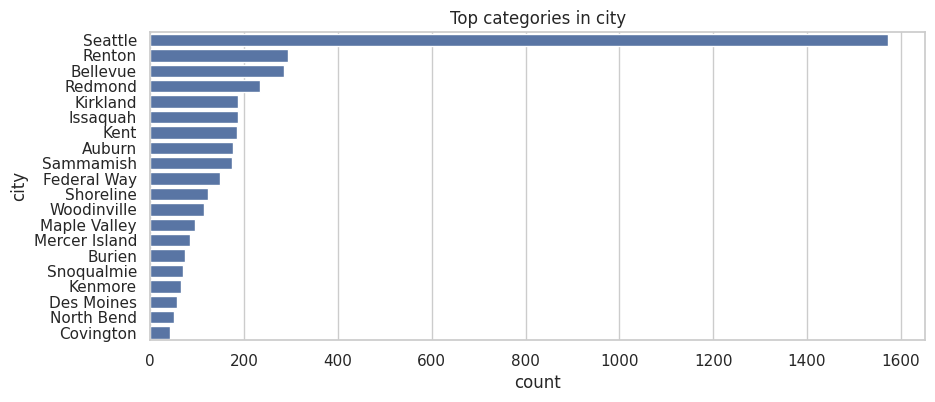


Value counts for statezip (top 10):


statezip
WA 98103    148
WA 98052    135
WA 98117    132
WA 98115    130
WA 98006    110
WA 98059    106
WA 98042    100
WA 98034     99
WA 98053     98
WA 98074     98
Name: count, dtype: int64

⚠️ Skipping barplot for statezip (too many unique values)

Value counts for country (top 10):


country
USA    4597
?         2
NaN       1
Name: count, dtype: int64

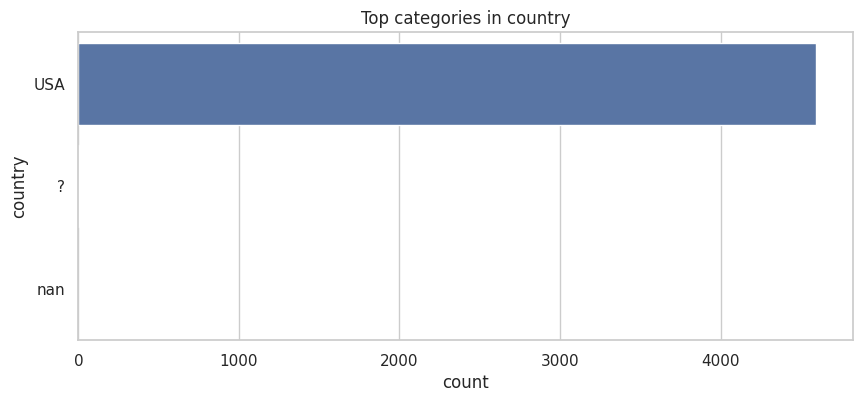

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Use sample for heavy numeric plots
sample_frac = 1.0 if len(df) <= 5000 else 0.2

# Histograms + KDE for numeric columns
for c in numeric_cols:
    plt.figure(figsize=(10,4))
    sns.histplot(
        df[c].dropna().sample(frac=sample_frac, random_state=1),
        kde=True
    )
    plt.title(f"Histogram + KDE — {c}")
    plt.xlabel(c)
    plt.show()

# Box + Violin plots for numeric columns
for c in numeric_cols:
    fig, ax = plt.subplots(1, 2, figsize=(12,4))
    sns.boxplot(
        x=df[c].dropna().sample(frac=sample_frac, random_state=1),
        ax=ax[0]
    )
    ax[0].set_title(f"Boxplot — {c}")

    sns.violinplot(
        x=df[c].dropna().sample(frac=sample_frac, random_state=1),
        ax=ax[1]
    )
    ax[1].set_title(f"Violin — {c}")
    plt.show()

# Categorical frequency & barplot
for c in cat_cols:
    counts = df[c].value_counts(dropna=False)
    print(f"\nValue counts for {c} (top 10):")
    display(counts.head(10))

    # Only plot if unique values are reasonable
    if counts.shape[0] <= 50:  # e.g., city, country
        plt.figure(figsize=(10,4))
        sns.countplot(
            y=c,
            data=df,
            order=counts.index[:20]
        )
        plt.title(f"Top categories in {c}")
        plt.show()
    else:
        print(f"⚠️ Skipping barplot for {c} (too many unique values)")


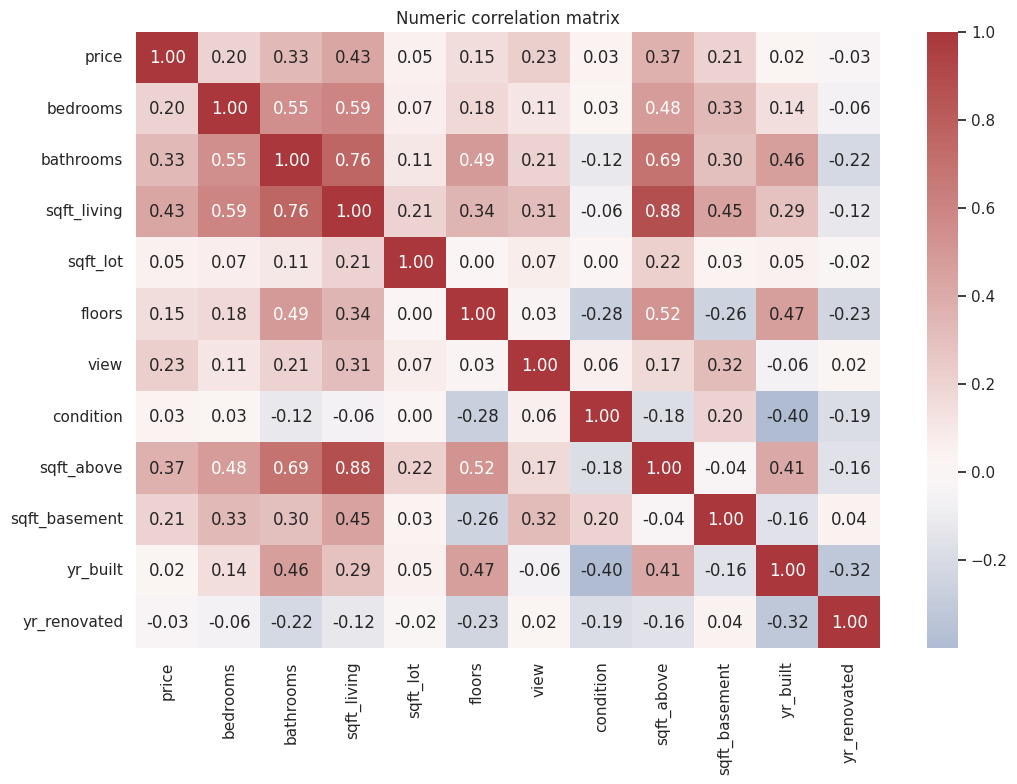

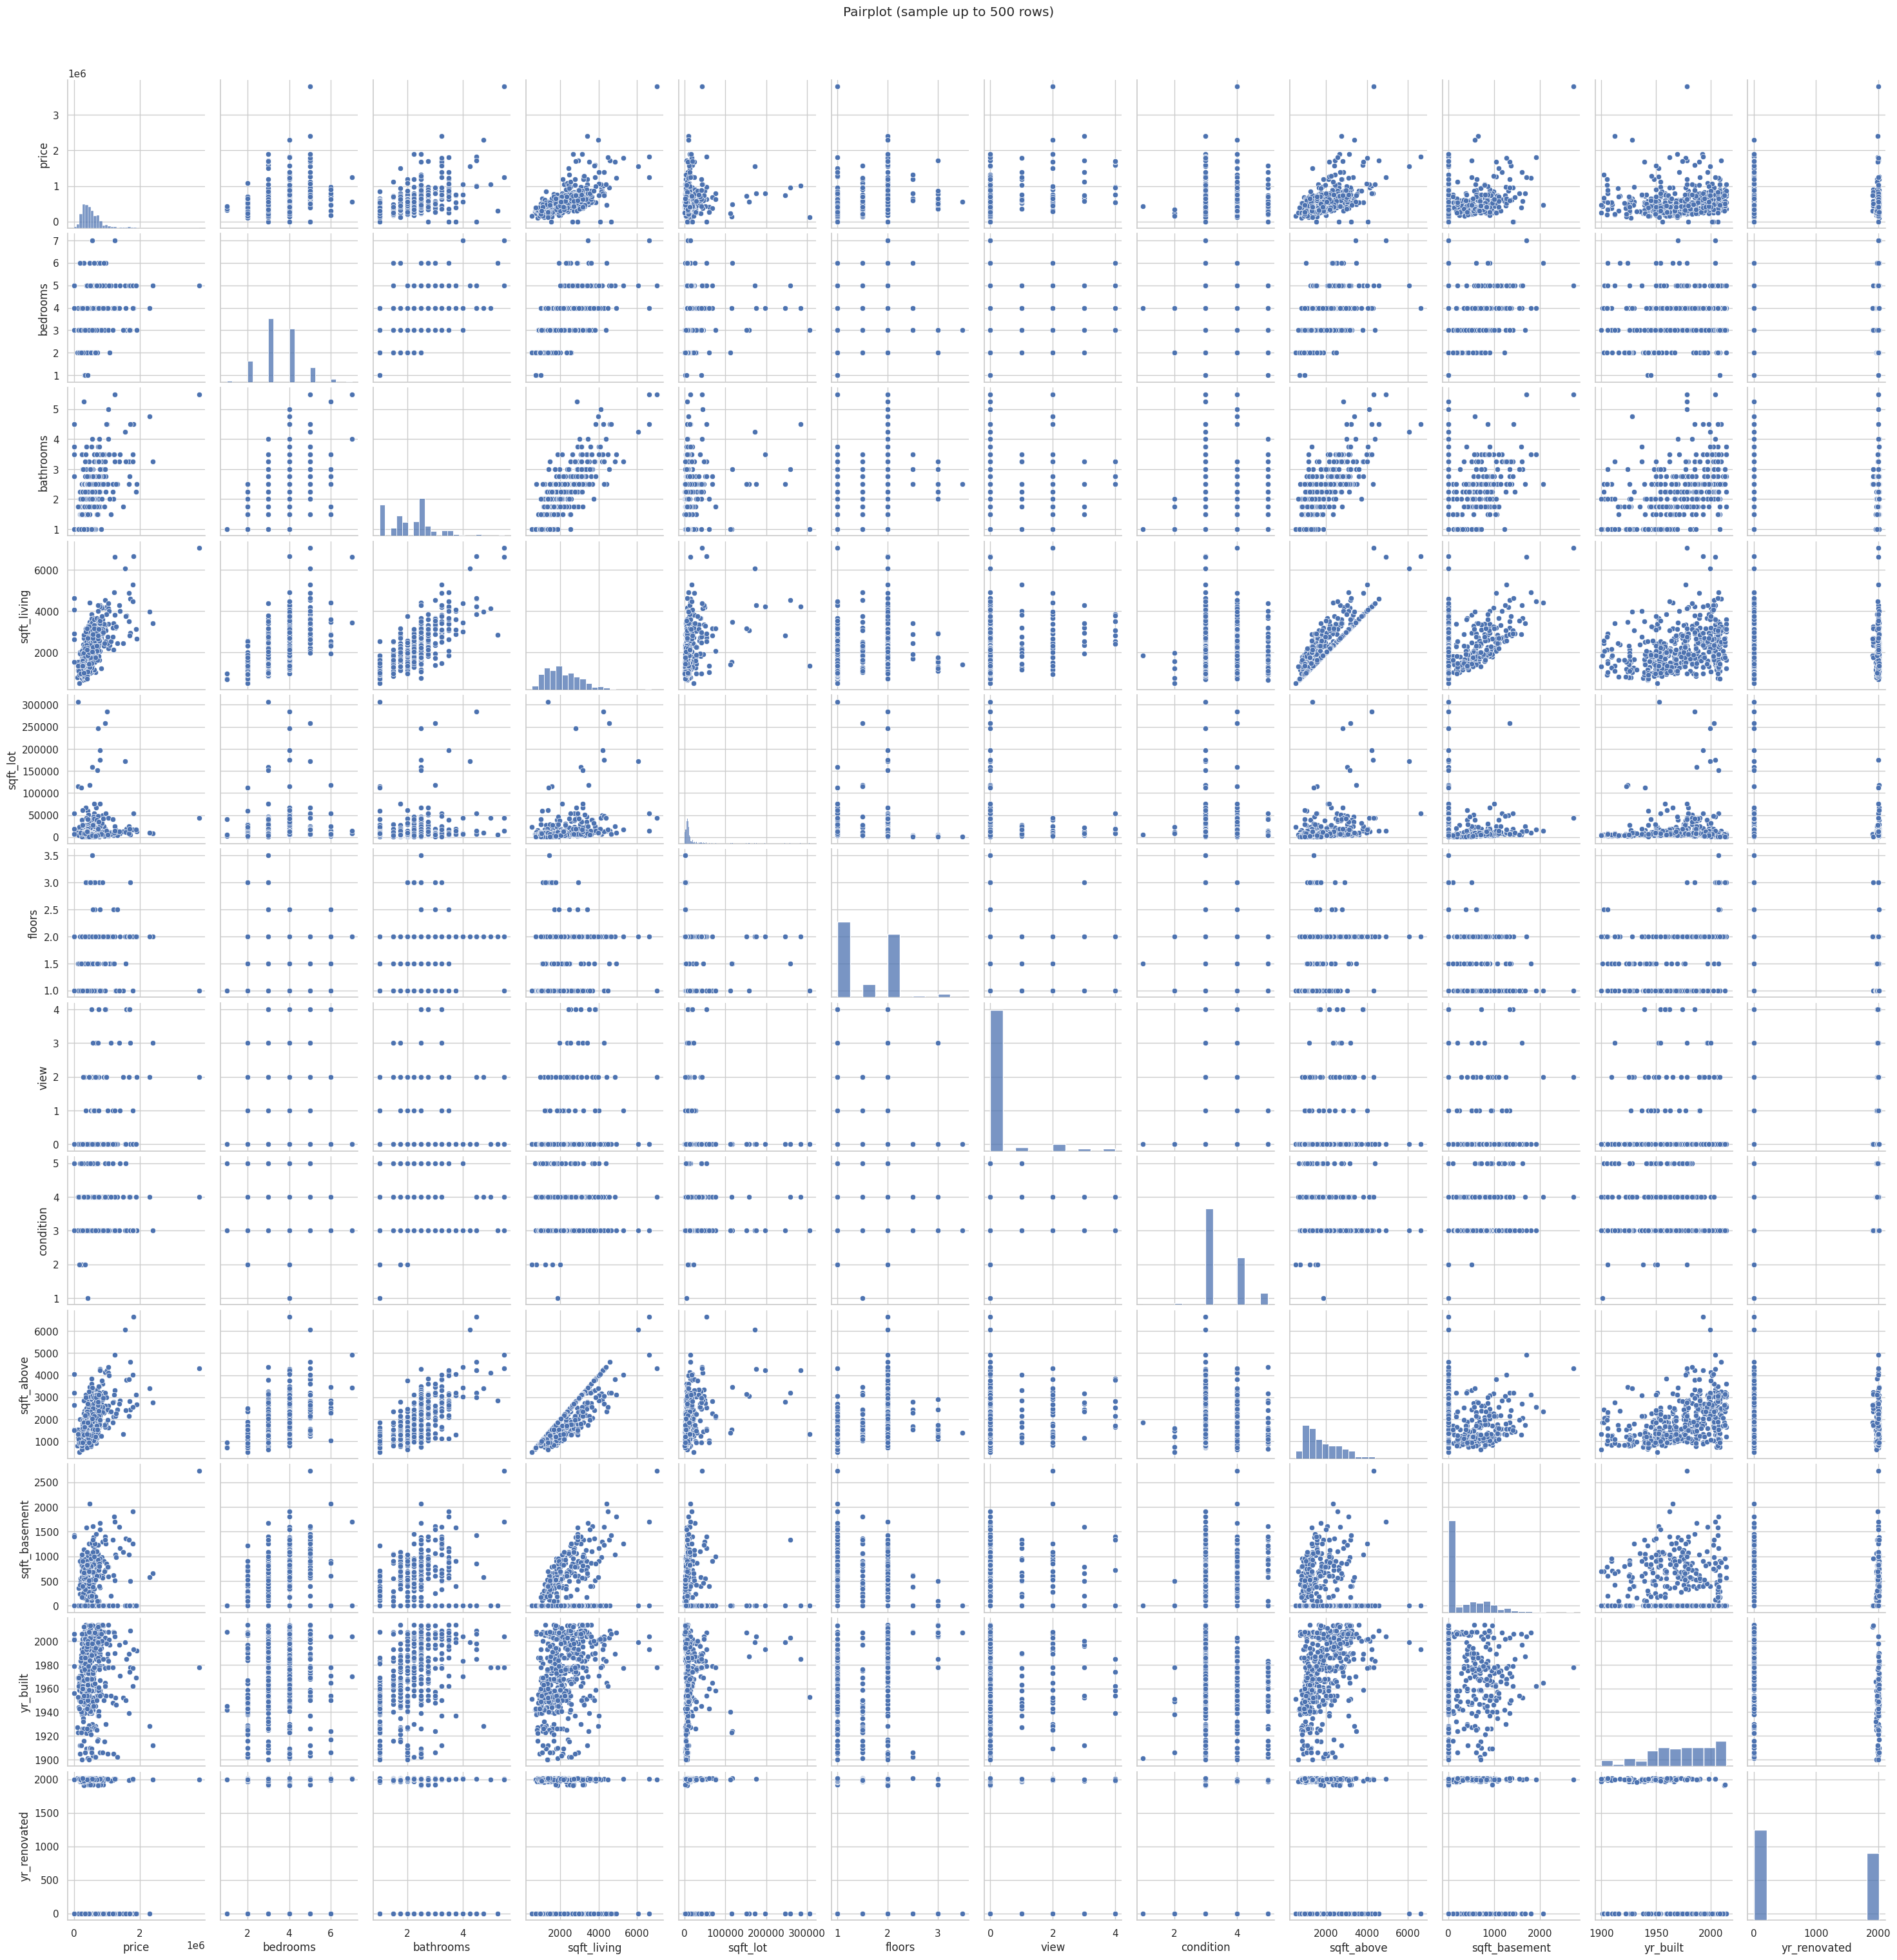


Top correlated numeric pairs:


sqft_living  sqft_above     0.876443
bathrooms    sqft_living    0.761154
             sqft_above     0.689918
dtype: float64

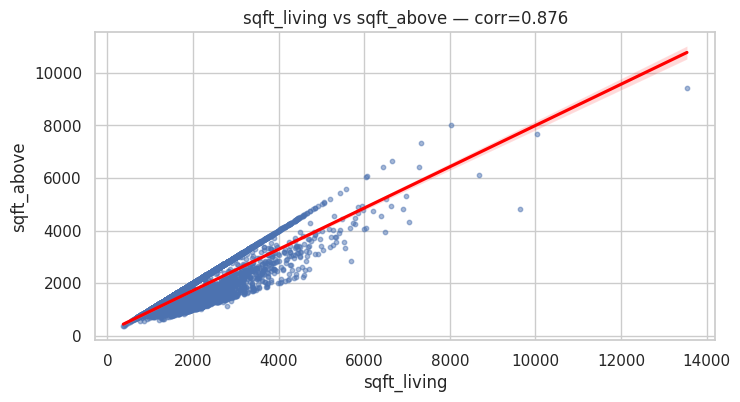

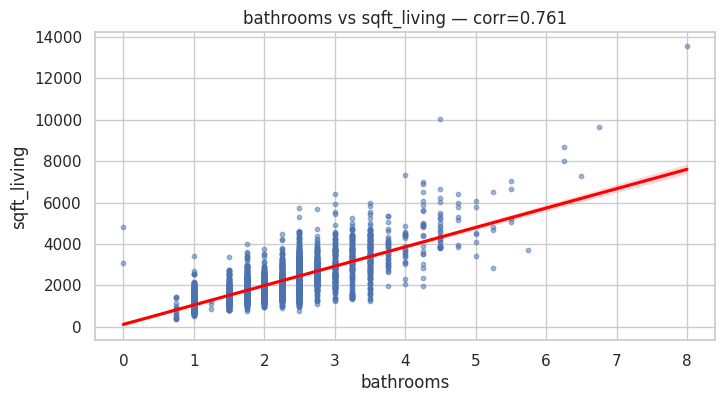

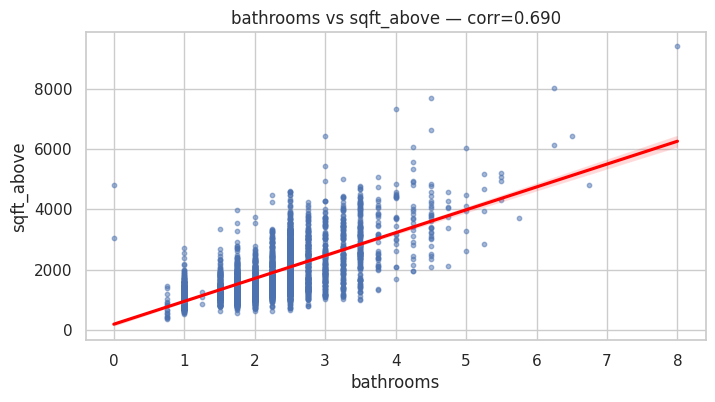

In [ ]:
# Correlation matrix for numeric features
corr = df[numeric_cols].corr()

plt.figure(figsize=(12,8))
sns.heatmap(
    corr, annot=True, fmt=".2f", cmap="vlag", center=0
)
plt.title("Numeric correlation matrix")
plt.show()

# Pairplot on numeric features (sample up to 500 rows to avoid clutter)
pair_sample = df[numeric_cols].dropna().sample(
    n=min(500, len(df)), random_state=1
)
sns.pairplot(pair_sample)
plt.suptitle("Pairplot (sample up to 500 rows)", y=1.02)
plt.show()

# Identify top 3 absolute correlated pairs (excluding self-correlation)
corr_triu = corr.where(np.triu(np.ones(corr.shape), k=1).astype(bool))
top_pairs = corr_triu.abs().stack().sort_values(ascending=False).head(3)

print("\nTop correlated numeric pairs:")
display(top_pairs)

# Scatter + regression for strongest pairs
for (a, b), val in top_pairs.items():
    plt.figure(figsize=(8,4))
    sns.regplot(
        x=df[a], y=df[b],
        scatter_kws={'s':10, 'alpha':0.5},
        line_kws={'color':'red'}
    )
    plt.title(f"{a} vs {b} — corr={corr.loc[a,b]:.3f}")
    plt.xlabel(a)
    plt.ylabel(b)
    plt.show()


⚠️ Skipping plots for date (too many unique values: 70)


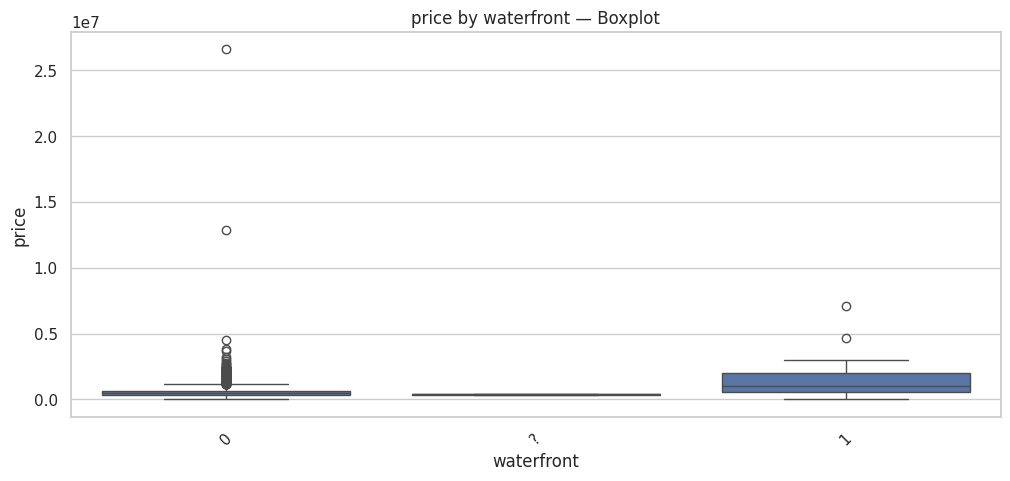

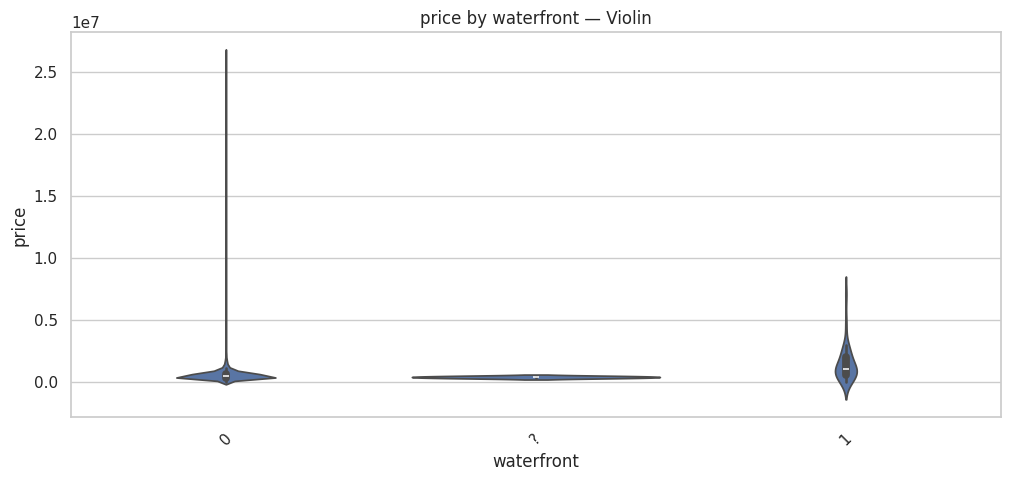

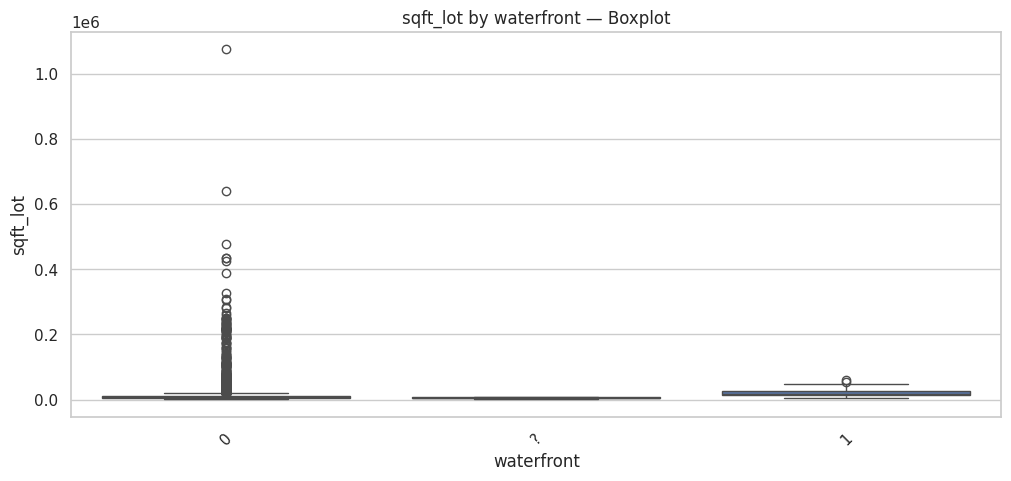

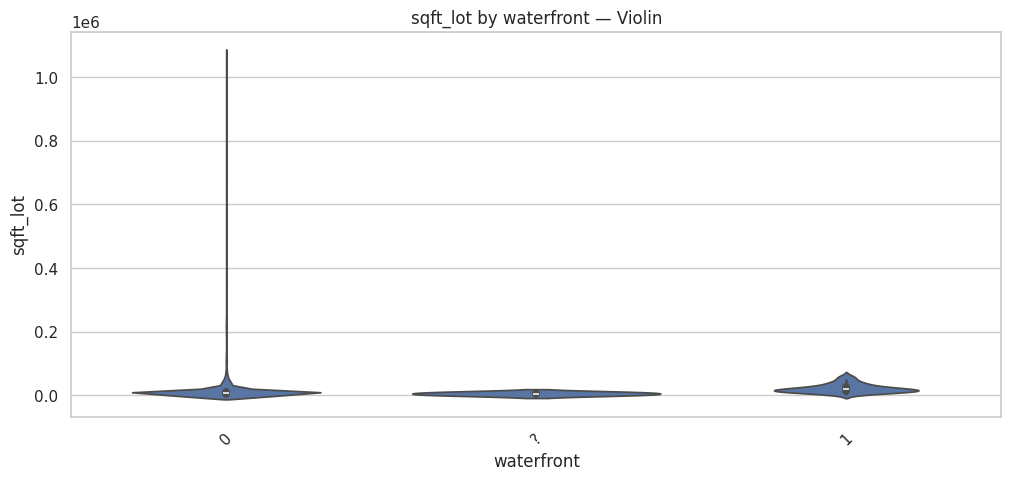

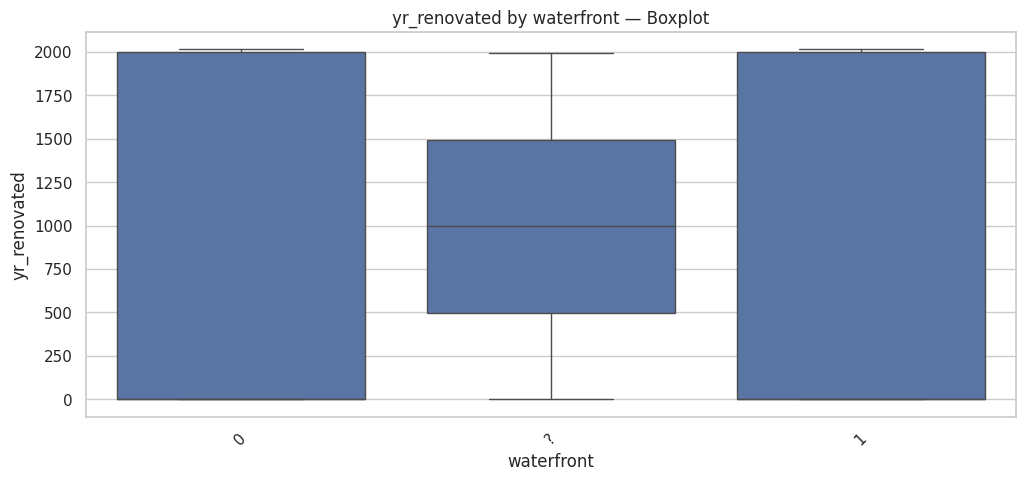

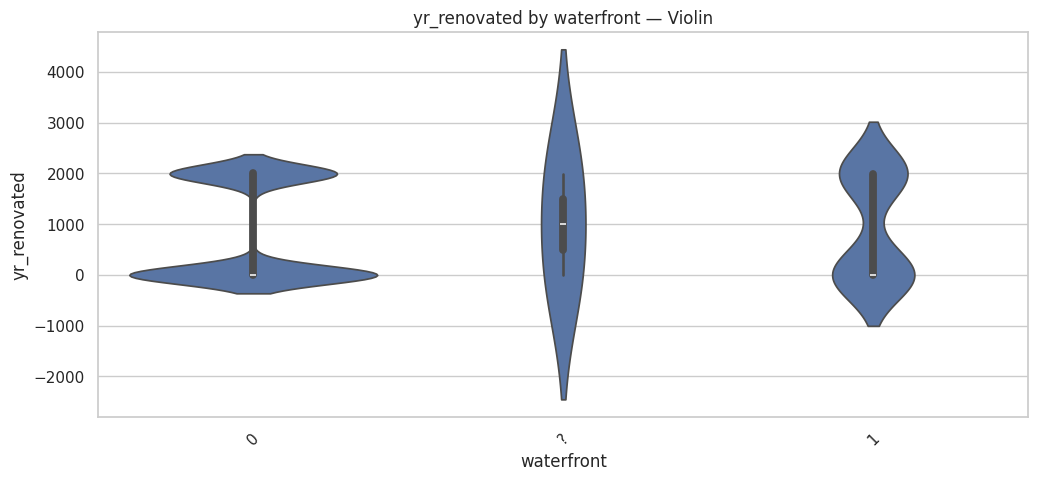

⚠️ Skipping plots for street (too many unique values: 4525)


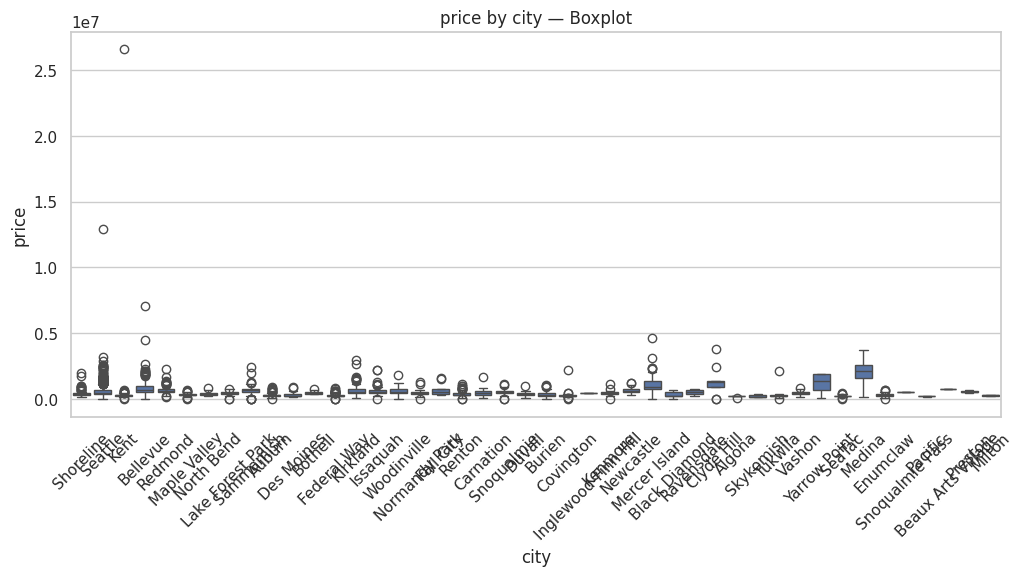

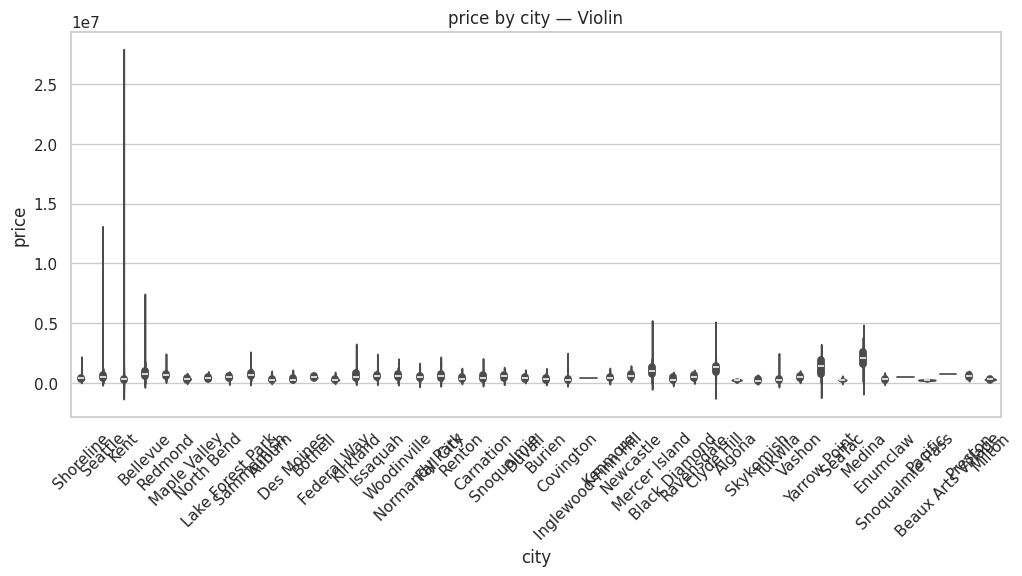

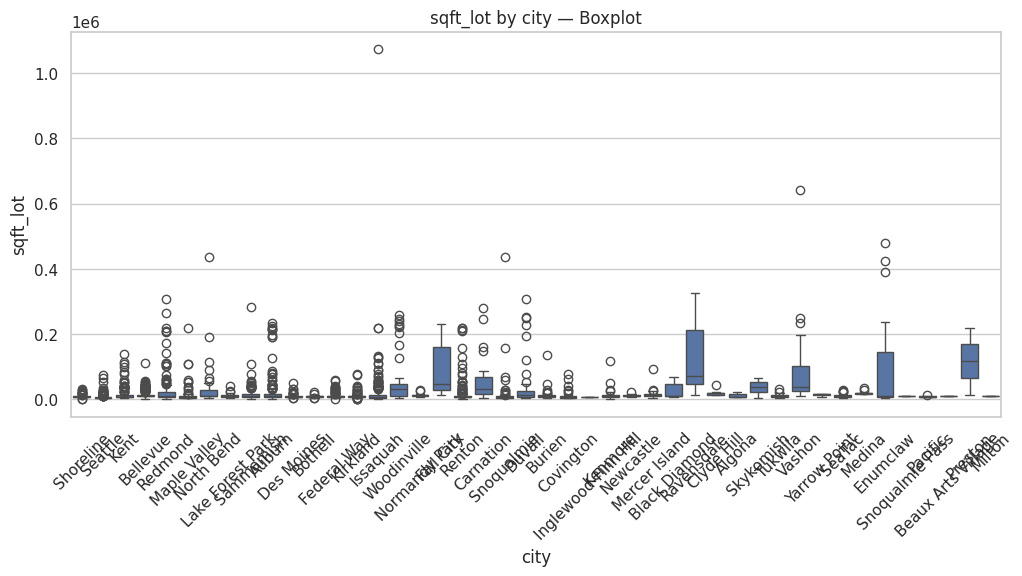

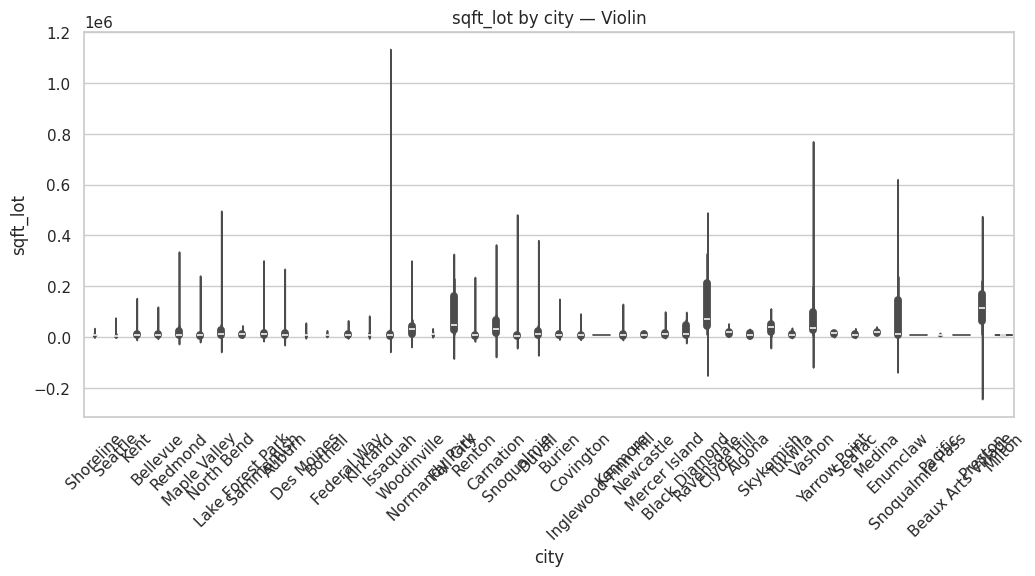

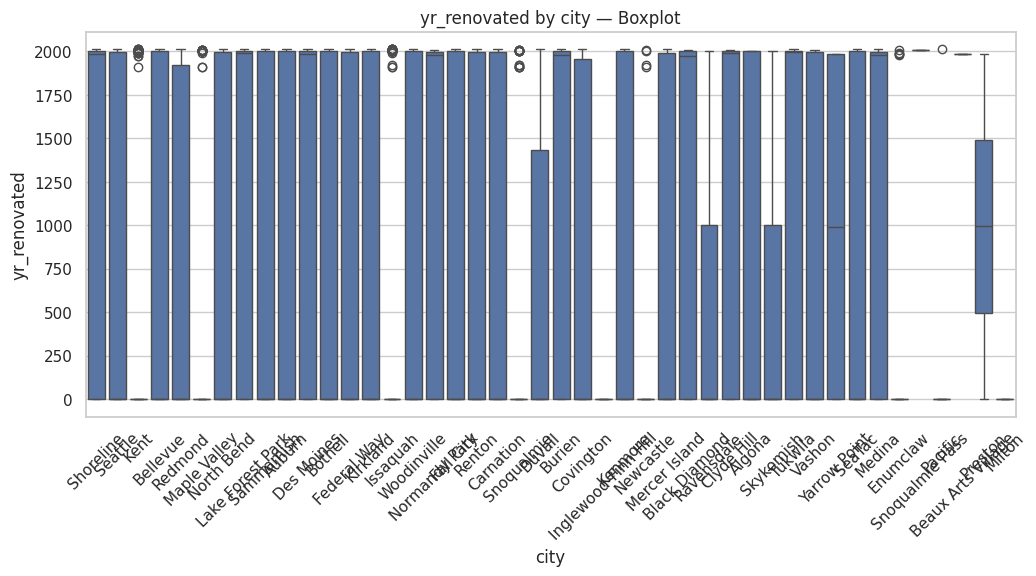

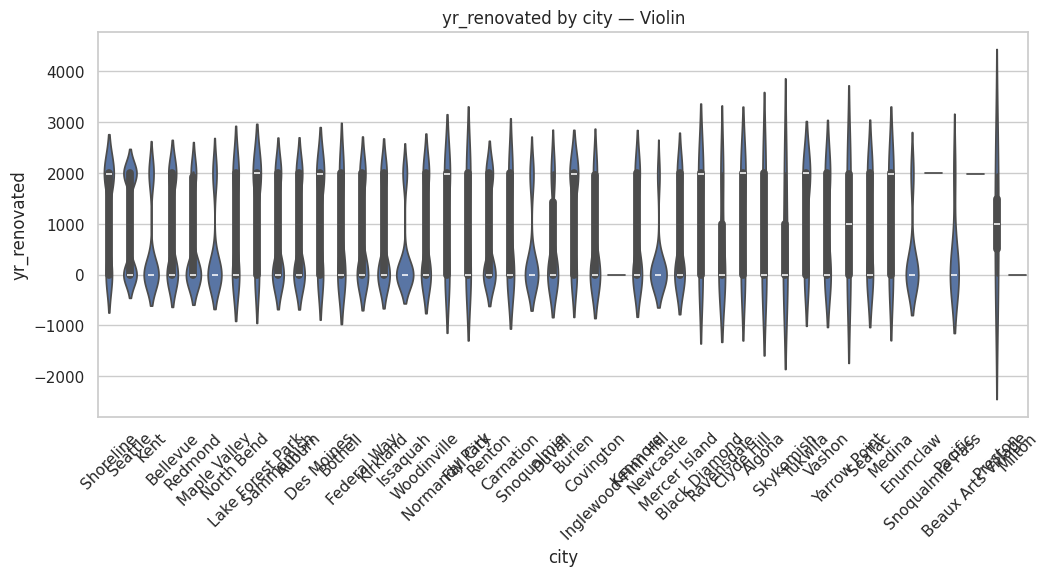

⚠️ Skipping plots for statezip (too many unique values: 77)


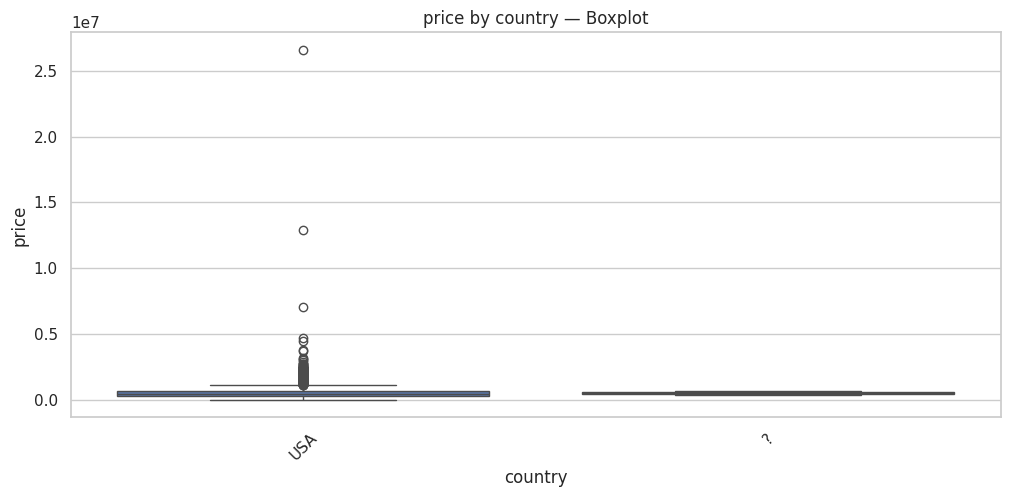

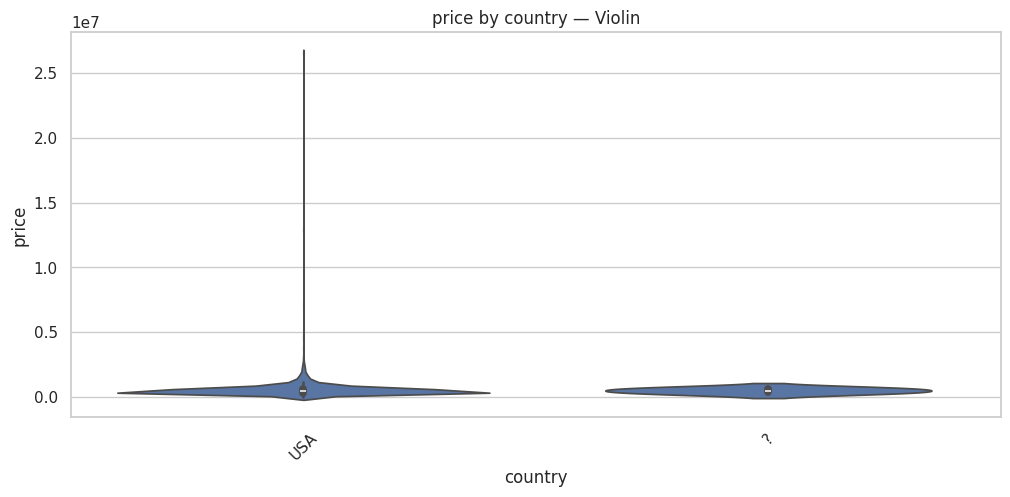

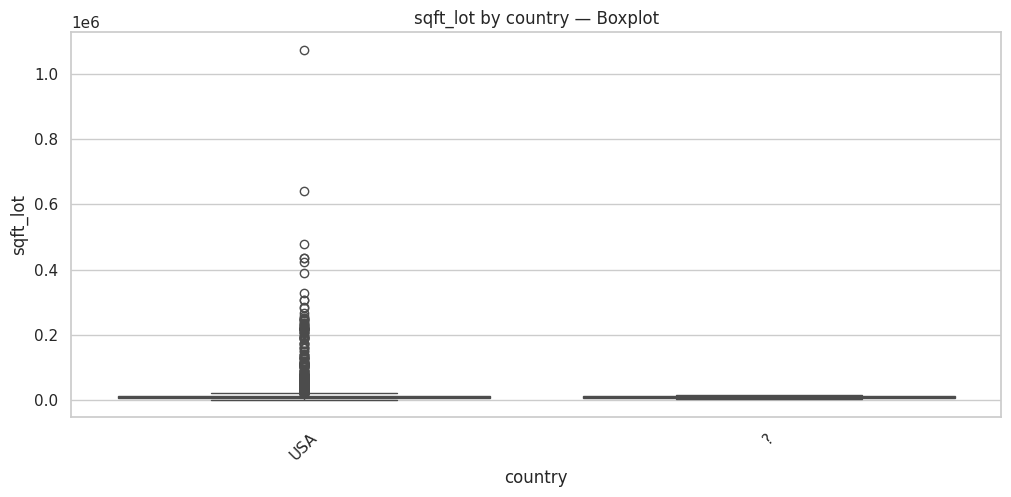

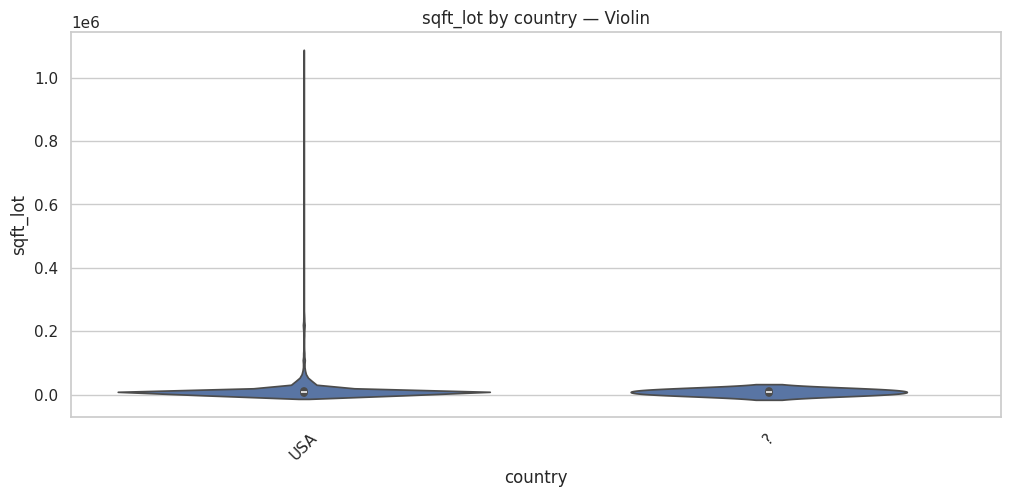

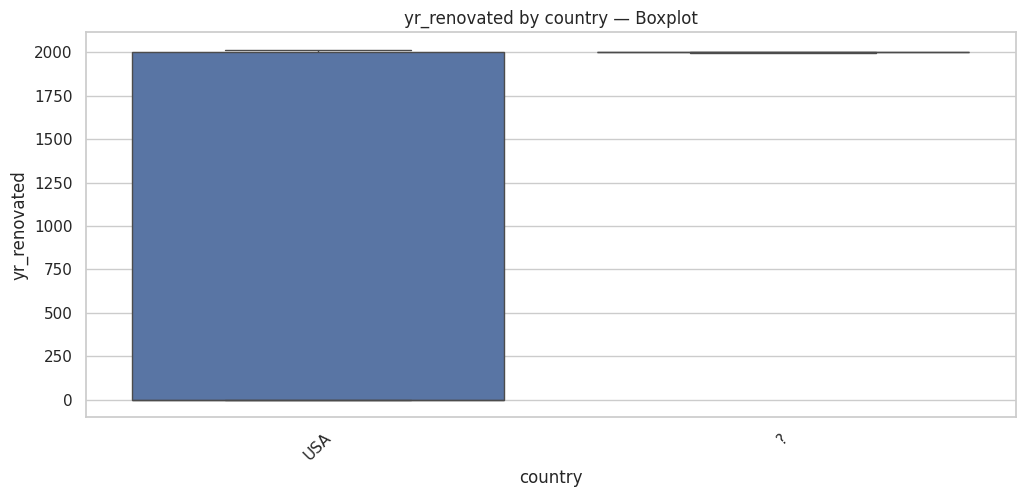

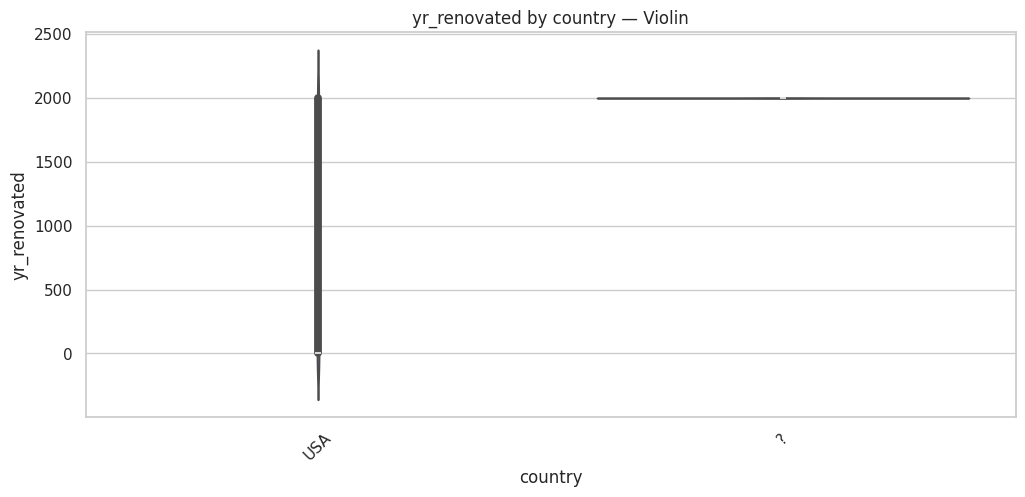

⚠️ Skipping group stats for date (too many unique values: 70)

Group stats — price by waterfront


count          mean    median           std
waterfront                                             
0            4561  5.454537e+05  460000.0  5.479891e+05
1              33  1.451621e+06  988500.0  1.425994e+06
?               2  3.794750e+05  379475.0  8.135264e+04


Group stats — bedrooms by waterfront


count      mean  median       std
waterfront                                   
0            4561  3.402105     3.0  0.907394
1              33  3.363636     3.0  1.084498
?               2  2.500000     2.5  0.707107


Group stats — bathrooms by waterfront


count      mean  median       std
waterfront                                   
0            4561  2.156325    2.25  0.776635
1              33  2.863636    2.50  1.308164
?               2  1.500000    1.50  0.353553

⚠️ Skipping group stats for street (too many unique values: 4525)

Group stats — price by city


count          mean    median           std
city                                                      
Seattle         1573  5.798375e+05  490000.0  4.627382e+05
Renton           293  3.770410e+05  345000.0  1.525533e+05
Bellevue         286  8.471807e+05  721500.0  5.936852e+05
Redmond          235  6.676495e+05  638000.0  2.334825e+05
Kirkland         187  6.515836e+05  522000.0  3.698472e+05
Issaquah         187  5.961637e+05  561000.0  2.456667e+05
Kent             185  4.394924e+05  283200.0  1.935125e+06
Auburn           176  2.993404e+05  274000.0  1.305229e+05
Sammamish        175  6.869176e+05  665000.0  2.685462e+05
Federal Way      148  2.898877e+05  264250.0  1.188720e+05
Shoreline        123  4.203924e+05  360000.0  2.424518e+05
Woodinville      115  6.095650e+05  559900.0  2.524943e+05
Maple Valley      96  3.364749e+05  320500.0  1.062645e+05
Mercer Island     86  1.123818e+06  948750.0  6.727013e+05
Burien            74  3.489472e+05  277500.0  2.148940e+05
Snoqualmie        71  5.363053e+05  527550.0  1.897786e+05
Kenmore           66  4.474940e+05  432045.0  1.400357e+05
Des Moines        58  3.049925e+05  256975.0  1.563120e+05
North Bend        50  3.995657e+05  394250.0  1.165561e+05
Covington         43  2.962304e+05  249500.0  3.096970e+05


Group stats — bedrooms by city


count      mean  median       std
city                                            
Seattle         1573  3.169739     3.0  1.005608
Renton           293  3.481229     3.0  0.821681
Bellevue         286  3.804196     4.0  0.835684
Redmond          235  3.421277     3.0  0.865516
Kirkland         187  3.540107     4.0  0.770593
Issaquah         187  3.561497     3.0  0.829700
Kent             185  3.459459     3.0  0.706899
Auburn           176  3.420455     3.0  0.788801
Sammamish        175  3.725714     4.0  0.655806
Federal Way      148  3.500000     3.0  0.769309
Shoreline        123  3.308943     3.0  0.933266
Woodinville      115  3.556522     4.0  0.727786
Maple Valley      96  3.489583     3.0  0.648801
Mercer Island     86  4.116279     4.0  0.912896
Burien            74  3.337838     3.0  1.076232
Snoqualmie        71  3.577465     4.0  0.872795
Kenmore           66  3.560606     3.0  0.746866
Des Moines        58  3.241379     3.0  0.884771
North Bend        50  3.300000     3.0  0.614452
Covington         43  3.325581     3.0  0.644424


Group stats — bathrooms by city


count      mean  median       std
city                                            
Seattle         1573  1.962174    2.00  0.807733
Renton           293  2.122014    2.25  0.692920
Bellevue         286  2.453671    2.50  0.835766
Redmond          235  2.380851    2.50  0.692339
Kirkland         187  2.327540    2.25  0.721690
Issaquah         187  2.593583    2.50  0.708483
Kent             185  2.139189    2.25  0.552801
Auburn           176  2.092330    2.00  0.676914
Sammamish        175  2.578571    2.50  0.608168
Federal Way      148  2.108108    2.25  0.674589
Shoreline        123  1.800813    1.75  0.767527
Woodinville      115  2.378261    2.50  0.738483
Maple Valley      96  2.346354    2.50  0.420479
Mercer Island     86  2.834302    2.75  0.966810
Burien            74  1.746622    1.75  0.766925
Snoqualmie        71  2.633803    2.50  0.765123
Kenmore           66  2.196970    2.25  0.527175
Des Moines        58  1.862069    1.75  0.642385
North Bend        50  2.200000    2.50  0.656599
Covington         43  1.970930    1.75  0.473114

⚠️ Skipping group stats for statezip (too many unique values: 77)

Group stats — price by country


count           mean    median            std
country                                               
USA       4597  552049.107456  461000.0  563989.907474
?            2  502500.000000  502500.0  236880.771697


Group stats — bedrooms by country


count      mean  median       std
country                                   
USA       4597  3.401349     3.0  0.908871
?            2  3.000000     3.0  0.000000


Group stats — bathrooms by country


count      mean  median       std
country                                   
USA       4597  2.160975   2.250  0.783833
?            2  2.375000   2.375  0.176777

In [ ]:
# For each categorical column, visualize distribution of top-variance numeric cols
for cat in cat_cols:
    # Skip very high cardinality categoricals like street
    if df[cat].nunique() > 50:
        print(f"⚠️ Skipping plots for {cat} (too many unique values: {df[cat].nunique()})")
        continue

    # pick top 3 numeric columns by variance
    top_nums = df[numeric_cols].var().sort_values(ascending=False).index[:3].tolist()

    for num in top_nums:
        plt.figure(figsize=(12,5))
        sns.boxplot(x=cat, y=num, data=df)
        plt.xticks(rotation=45)
        plt.title(f"{num} by {cat} — Boxplot")
        plt.show()

        plt.figure(figsize=(12,5))
        sns.violinplot(x=cat, y=num, data=df)
        plt.xticks(rotation=45)
        plt.title(f"{num} by {cat} — Violin")
        plt.show()

# Group statistics by categorical features
for cat in cat_cols:
    # Again, skip too-high-cardinality columns
    if df[cat].nunique() > 50:
        print(f"⚠️ Skipping group stats for {cat} (too many unique values: {df[cat].nunique()})")
        continue

    for num in numeric_cols[:3]:  # first 3 numeric cols for readability
        print(f"\nGroup stats — {num} by {cat}")
        display(
            df.groupby(cat)[num].agg(['count','mean','median','std'])
              .sort_values('count', ascending=False).head(20)
        )


Contingency table: waterfront x city


city        Algona  Auburn  Beaux Arts Village  Bellevue  Black Diamond  \
waterfront                                                                
0                5     176                   1       283              9   
1                0       0                   0         2              0   
?                0       0                   0         0              0   

city        Bothell  Burien  Carnation  Clyde Hill  Covington  ...  SeaTac  \
waterfront                                                     ...           
0                33      71         22          11         43  ...      29   
1                 0       3          0           0          0  ...       0   
?                 0       0          0           0          0  ...       0   

city        Seattle  Shoreline  Skykomish  Snoqualmie  Snoqualmie Pass  \
waterfront                                                               
0              1565        123          3          71                1   
1                 4          0          0           0                0   
?                 1          0          0           0                0   

city        Tukwila  Vashon  Woodinville  Yarrow Point  
waterfront                                              
0                29      22          115             4  
1                 0       7            0             0  
?                 0       0            0             0  

[3 rows x 44 columns]

Chi-square test p-value: 0.0000
⚠️ Skipping stacked bar for waterfront x city (too many categories)

Contingency table: waterfront x country


country     ?   USA
waterfront         
0           2  4558
1           0    33
?           0     2

Chi-square test p-value: 0.9924


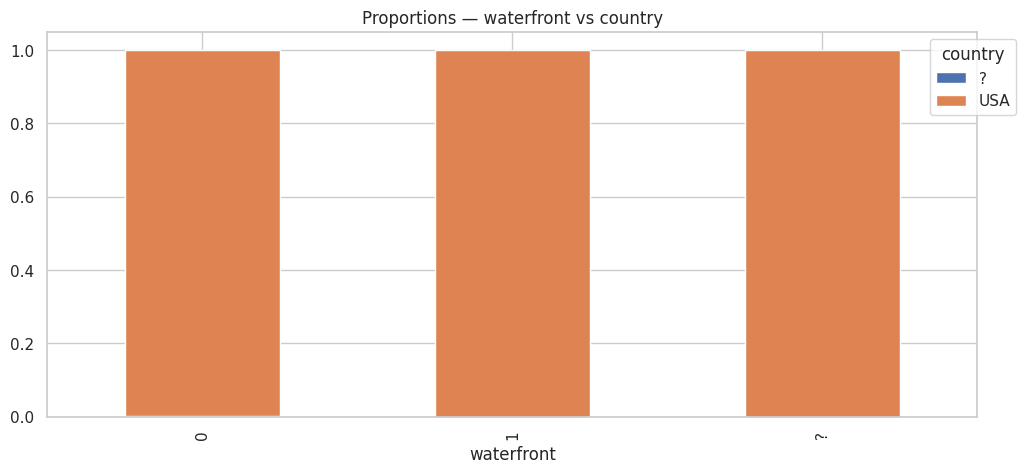


Contingency table: waterfront x year


year        2014
waterfront      
0           4561
1             33
?              2

Chi-square test p-value: 1.0000


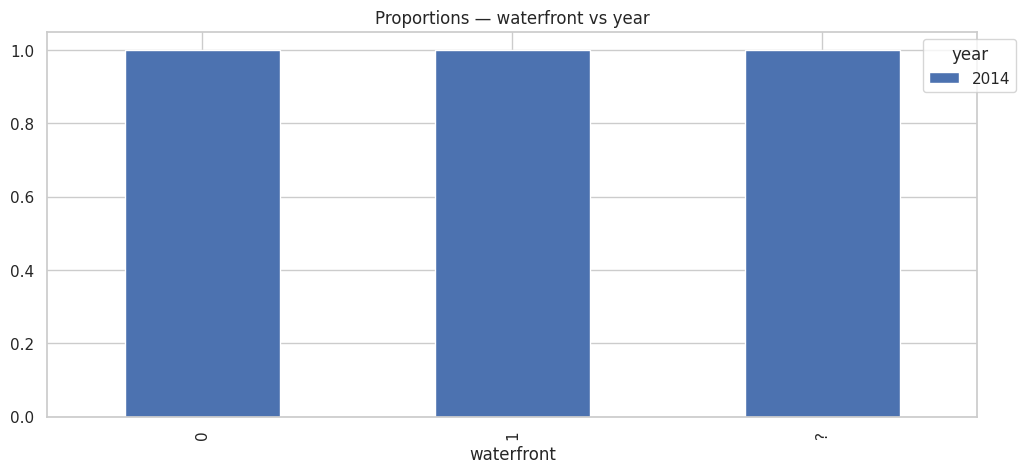


Contingency table: city x country


country             ?  USA
city                      
Algona              0    5
Auburn              0  176
Beaux Arts Village  0    1
Bellevue            0  286
Black Diamond       0    9
Bothell             0   33
Burien              0   74
Carnation           0   22
Clyde Hill          0   11
Covington           0   43

Chi-square test p-value: 0.0000
⚠️ Skipping stacked bar for city x country (too many categories)

Contingency table: city x year


year                2014
city                    
Algona                 5
Auburn               176
Beaux Arts Village     1
Bellevue             286
Black Diamond          9
Bothell               33
Burien                74
Carnation             22
Clyde Hill            11
Covington             43

Chi-square test p-value: 1.0000
⚠️ Skipping stacked bar for city x year (too many categories)

Contingency table: country x year


year     2014
country      
?           2
USA      4597

Chi-square test p-value: 1.0000


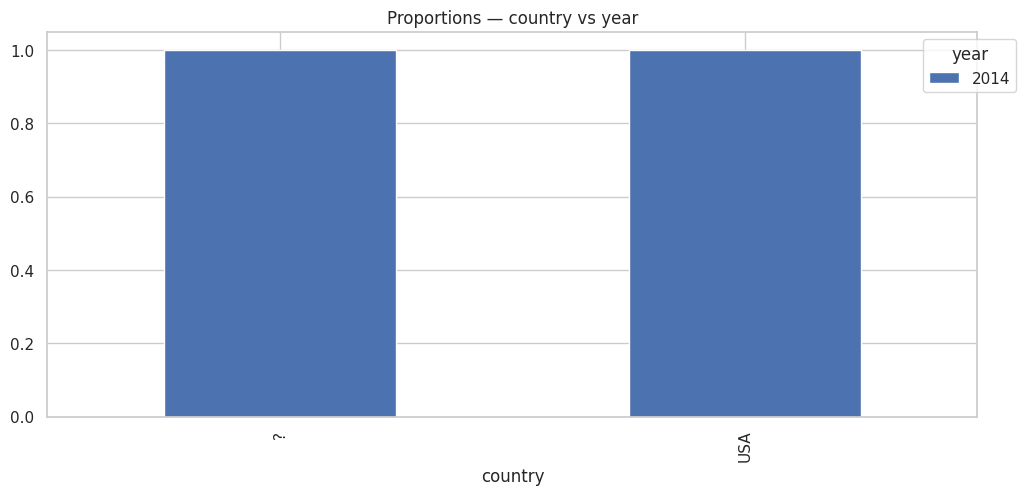

In [ ]:
from scipy.stats import chi2_contingency

# Make a safe categorical list (exclude high-cardinality features like street)
safe_cat_cols = [c for c in cat_cols if df[c].nunique() <= 50]

# Optional: extract year from date for better grouping
if 'date' in df.columns:
    df['year'] = pd.to_datetime(df['date'], errors='coerce').dt.year
    safe_cat_cols.append('year')

for i in range(min(3, len(safe_cat_cols))):
    for j in range(i+1, min(i+4, len(safe_cat_cols))):
        c1, c2 = safe_cat_cols[i], safe_cat_cols[j]

        # Build contingency table
        ct = pd.crosstab(df[c1], df[c2])
        print(f"\nContingency table: {c1} x {c2}")
        display(ct.head(10))  # show only first 10 rows if large

        # Chi-square test (only if not too sparse)
        if ct.size > 1 and ct.values.sum() > 20:
            chi2, p, dof, ex = chi2_contingency(ct)
            print(f"Chi-square test p-value: {p:.4f}")

        # Proportional stacked barplot (skip if too many categories)
        if ct.shape[0] <= 20 and ct.shape[1] <= 20:
            ct_prop = ct.div(ct.sum(axis=1), axis=0)
            ct_prop.plot(kind='bar', stacked=True, figsize=(12,5))
            plt.title(f"Proportions — {c1} vs {c2}")
            plt.legend(title=c2, bbox_to_anchor=(1.05,1))
            plt.show()
        else:
            print(f"⚠️ Skipping stacked bar for {c1} x {c2} (too many categories)")


3D scatter features: ['price', 'sqft_lot', 'yr_renovated']


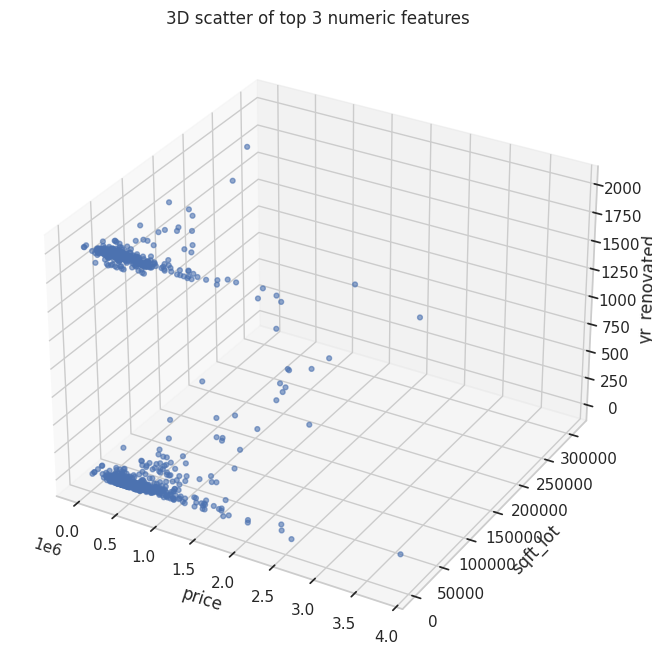

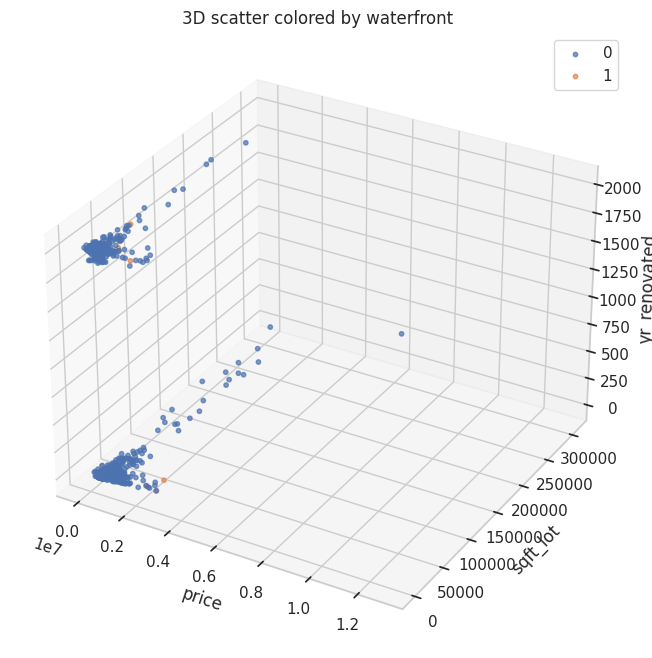

In [ ]:
from mpl_toolkits.mplot3d import Axes3D

# 3D scatter of top 3 numeric features (by variance)
if len(numeric_cols) >= 3:
    top3 = df[numeric_cols].var().sort_values(ascending=False).index[:3].tolist()
    print("3D scatter features:", top3)

    sample = df[top3].dropna().sample(n=min(1000, len(df)), random_state=1)

    fig = plt.figure(figsize=(10,8))
    ax = fig.add_subplot(111, projection='3d')
    ax.scatter(sample[top3[0]], sample[top3[1]], sample[top3[2]], s=12, alpha=0.6)
    ax.set_xlabel(top3[0]); ax.set_ylabel(top3[1]); ax.set_zlabel(top3[2])
    plt.title("3D scatter of top 3 numeric features")
    plt.show()

# Alternative: 3D scatter colored by categorical (low cardinality only)
low_card_cats = [c for c in cat_cols if df[c].nunique() <= 20]

if low_card_cats and len(numeric_cols) >= 3:
    cat = low_card_cats[0]  # choose first low-card categorical
    sample = df[top3 + [cat]].dropna().sample(n=min(1000, len(df)), random_state=1)

    fig = plt.figure(figsize=(10,8))
    ax = fig.add_subplot(111, projection='3d')
    unique_cats = sample[cat].unique()

    for u in unique_cats[:8]:  # limit to 8 categories for clarity
        s = sample[sample[cat] == u]
        ax.scatter(s[top3[0]], s[top3[1]], s[top3[2]], label=str(u), s=10, alpha=0.7)

    ax.set_xlabel(top3[0]); ax.set_ylabel(top3[1]); ax.set_zlabel(top3[2])
    ax.legend(loc='upper right')
    plt.title(f"3D scatter colored by {cat}")
    plt.show()

Detected date/year column: date
Time series target: price


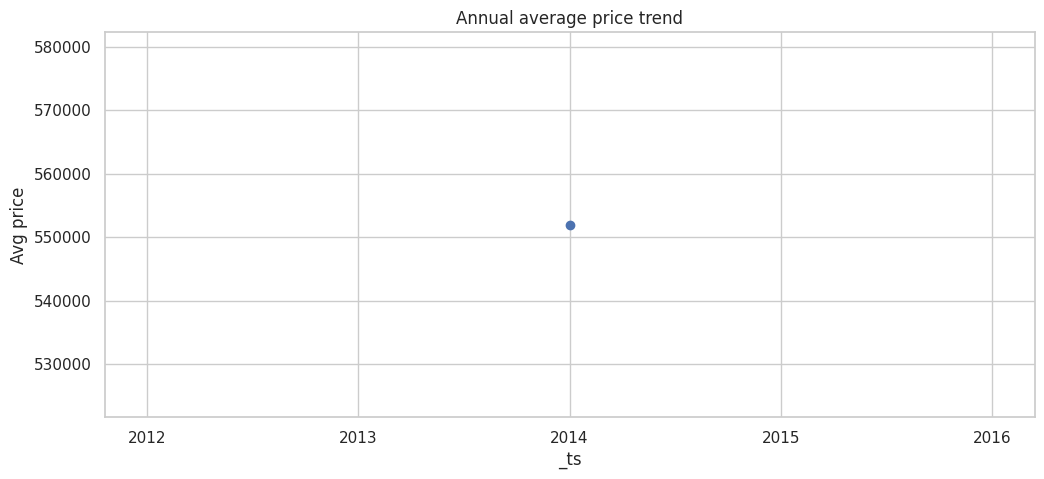

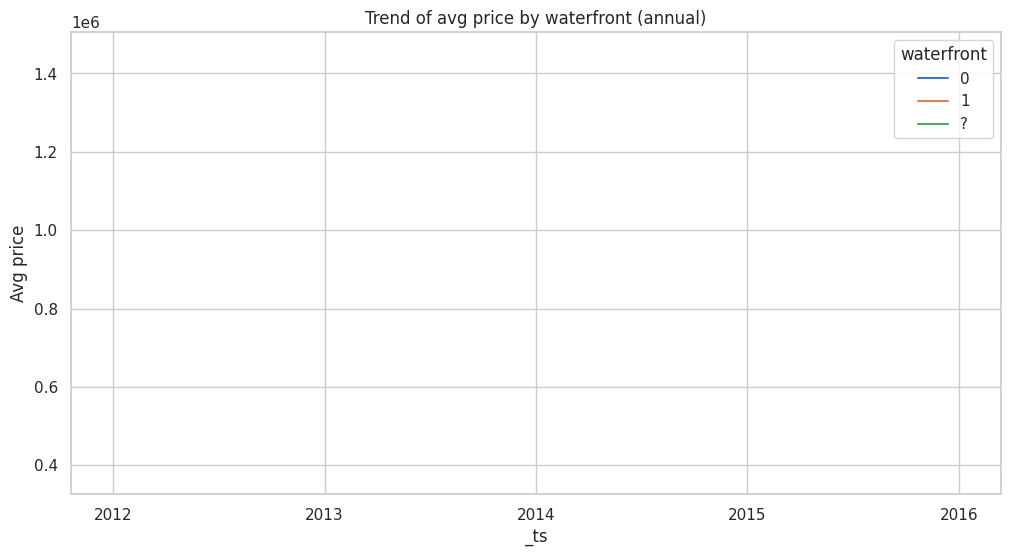

In [ ]:
# Attempt to find a date/year-like column
date_col = None
for c in df.columns:
    if c.lower() in ['year','date','time','year_id','yr']:
        date_col = c
        break

# If no candidate, try numeric year-like columns
if date_col is None:
    for c in df.columns:
        if pd.api.types.is_integer_dtype(df[c]) or pd.api.types.is_float_dtype(df[c]):
            vals = df[c].dropna().unique()
            if len(vals) > 0 and np.all((vals >= 1900) & (vals <= 2100)):
                date_col = c
                break

if date_col:
    print("Detected date/year column:", date_col)

    # Parse date
    try:
        df['_ts'] = pd.to_datetime(df[date_col], errors='coerce')
    except:
        df['_ts'] = pd.to_datetime(df[date_col], errors='coerce', infer_datetime_format=True)

    df_ts = df.set_index('_ts').sort_index()

    # Target = house price
    target = 'price' if 'price' in df.columns else numeric_cols[0]
    print("Time series target:", target)

    # Annual trend (resample by year, mean house price makes more sense than sum)
    ts = df_ts[target].resample('Y').mean()
    plt.figure(figsize=(12,5))
    ts.plot(marker='o')
    plt.title(f"Annual average {target} trend")
    plt.ylabel(f"Avg {target}")
    plt.show()

    # Rolling mean + log-transform if enough points
    if len(ts.dropna()) >= 8:
        ts_log = np.log1p(ts)
        rolling = ts_log.rolling(window=3, center=False).mean()
        plt.figure(figsize=(12,5))
        ts_log.plot(label='log(target)')
        rolling.plot(label='rolling mean (3)')
        plt.legend()
        plt.title("Log-transform + rolling mean (annual avg)")
        plt.show()

    # Group by another categorical (if exists, low cardinality)
    low_card_cats = [c for c in cat_cols if df[c].nunique() <= 20]
    if low_card_cats:
        cat = low_card_cats[0]
        grouped = df_ts.groupby([pd.Grouper(freq='Y'), cat])[target].mean().unstack(fill_value=0)
        grouped.plot(figsize=(12,6))
        plt.title(f"Trend of avg {target} by {cat} (annual)")
        plt.ylabel(f"Avg {target}")
        plt.show()
else:
    print("No date/year-like column detected — skip time series. If you want time-series work, add a YYYY or YYYY-MM-DD column.")


In [ ]:
from sklearn.preprocessing import StandardScaler

# Feature selection for clustering: choose numeric columns with enough non-null ratio
min_non_null_ratio = 0.6
clust_features = [c for c in numeric_cols if df[c].notna().mean() >= min_non_null_ratio]

# If too many, pick top 6 by variance
clust_features = list(df[clust_features].var().sort_values(ascending=False).index[:6])
print("Clustering features:", clust_features)

# Prepare X: drop rows with NA in selected features
X = df[clust_features].dropna().copy()
print("Rows used for clustering:", len(X))

# Scale features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


Clustering features: ['price', 'sqft_lot', 'yr_renovated', 'sqft_living', 'sqft_above', 'sqft_basement']
Rows used for clustering: 4600


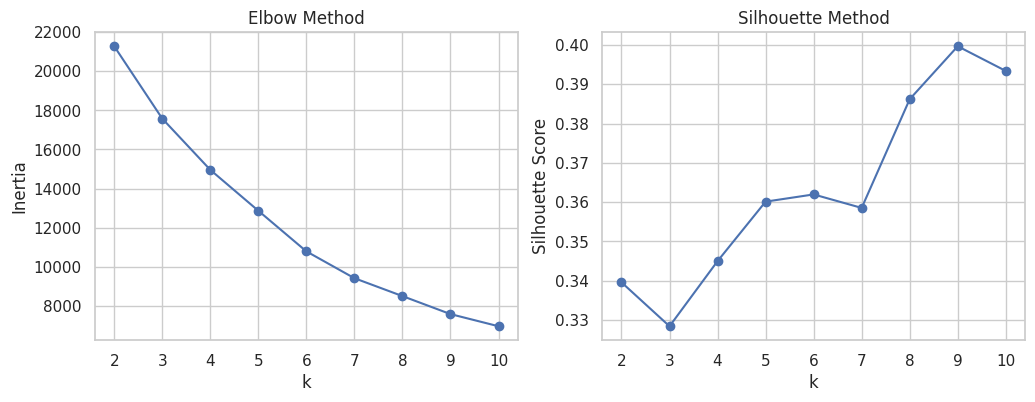

Best k by silhouette: 9


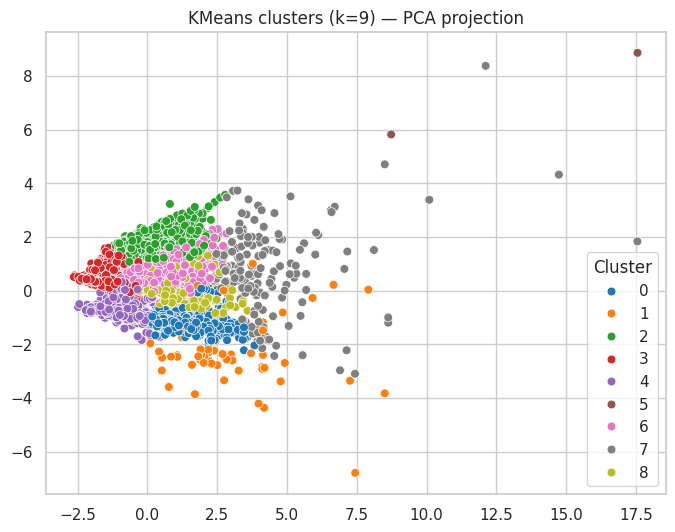

Cluster centers (original scale):


0              1              2              3  \
price          6.636728e+05  638780.845770  598992.565267  371376.617060   
sqft_lot       1.397933e+04  248587.537313   11050.080412    8836.071429   
yr_renovated  -2.160050e-12     597.701493    1996.195876    1995.717391   
sqft_living    2.846044e+03    3052.985075    2417.812371    1350.673913   
sqft_above     2.821796e+03    2780.522388    1486.224742    1249.618012   
sqft_basement  2.424827e+01     272.462687     931.587629     101.055901   

                          4           5             6             7  \
price          3.826710e+05  19744500.0  5.942937e+05  1.593714e+06   
sqft_lot       8.459359e+03      9593.5  1.138591e+04  2.642423e+04   
yr_renovated  -1.784883e-11      1000.5  3.637979e-12  5.747301e+02   
sqft_living    1.503733e+03      1685.0  2.453126e+03  4.862546e+03   
sqft_above     1.420990e+03      1365.0  1.531401e+03  3.783319e+03   
sqft_basement  8.274299e+01       320.0  9.217255e+02  1.079227e+03   

                           8  
price          676506.313863  
sqft_lot        17217.254335  
yr_renovated     1988.011561  
sqft_living      2770.523121  
sqft_above       2722.719653  
sqft_basement      47.803468


Cluster summary (mean values):


price       sqft_lot  yr_renovated  sqft_living  \
cluster_km                                                           
0           6.636728e+05   13979.327323      0.000000  2846.044383   
1           6.387808e+05  248587.537313    597.701493  3052.985075   
2           5.985277e+05   11064.646694   1996.188017  2415.225207   
3           3.713766e+05    8836.071429   1995.717391  1350.673913   
4           3.826710e+05    8459.359488      0.000000  1503.733387   
5           1.974450e+07    9593.500000   1000.500000  1685.000000   
6           5.942937e+05   11385.911814      0.000000  2453.126456   
7           1.593714e+06   26424.233129    574.730061  4862.546012   
8           6.769314e+05   17179.164265   1988.046110  2773.115274   

             sqft_above  sqft_basement  
cluster_km                              
0           2821.796117      24.248266  
1           2780.522388     272.462687  
2           1483.510331     931.714876  
3           1249.618012     101.055901  
4           1420.990392      82.742994  
5           1365.000000     320.000000  
6           1531.400998     921.725458  
7           3783.319018    1079.226994  
8           2722.942363      50.172911

In [ ]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.decomposition import PCA

# KMeans: elbow + silhouette analysis
inertia = []
sil = []
K = range(2, 11)

for k in K:
    km = KMeans(n_clusters=k, random_state=1, n_init=10)
    labels = km.fit_predict(X_scaled)
    inertia.append(km.inertia_)
    sil.append(silhouette_score(X_scaled, labels))

# Plot elbow and silhouette
plt.figure(figsize=(12,4))
plt.subplot(1,2,1)
plt.plot(K, inertia, '-o')
plt.xlabel('k'); plt.ylabel('Inertia')
plt.title('Elbow Method')

plt.subplot(1,2,2)
plt.plot(K, sil, '-o')
plt.xlabel('k'); plt.ylabel('Silhouette Score')
plt.title('Silhouette Method')
plt.show()

# Best k by silhouette
best_k = K[np.argmax(sil)]
print("Best k by silhouette:", best_k)

# Fit final KMeans
km_final = KMeans(n_clusters=best_k, random_state=1, n_init=20)
labels_km = km_final.fit_predict(X_scaled)

# Attach cluster labels
X_km = X.copy()
X_km['cluster_km'] = labels_km

# PCA projection (2D visualization)
pca = PCA(n_components=2, random_state=1)
proj = pca.fit_transform(X_scaled)

plt.figure(figsize=(8,6))
sns.scatterplot(x=proj[:,0], y=proj[:,1], hue=labels_km, palette='tab10', s=40)
plt.title(f"KMeans clusters (k={best_k}) — PCA projection")
plt.legend(title='Cluster')
plt.show()

# Cluster centers in original scale
centers = scaler.inverse_transform(km_final.cluster_centers_)
centers_df = pd.DataFrame(centers, columns=clust_features)
print("Cluster centers (original scale):")
display(centers_df.T)

# Optional: Summary stats per cluster
print("\nCluster summary (mean values):")
display(X_km.groupby('cluster_km').mean())


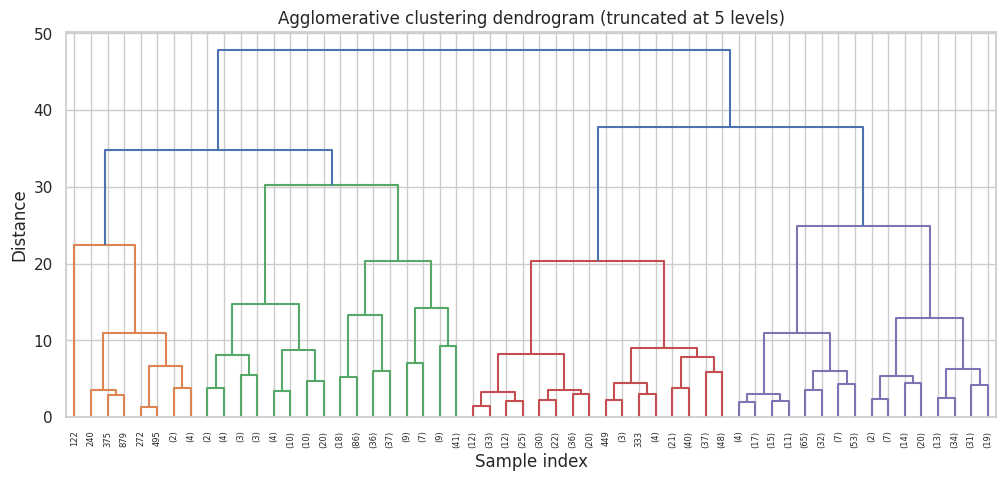

Agglomerative clustering with 9 clusters
Cluster counts: {np.int64(0): np.int64(376), np.int64(1): np.int64(61), np.int64(2): np.int64(563), np.int64(3): np.int64(452), np.int64(4): np.int64(1), np.int64(5): np.int64(1341), np.int64(6): np.int64(594), np.int64(7): np.int64(537), np.int64(8): np.int64(675)}

Cluster summary (mean values):


price       sqft_lot  yr_renovated  sqft_living  \
cluster_agg                                                           
0            1.150417e+06   16429.172872    923.984043  3787.941489   
1            6.139027e+05  256073.114754    590.770492  2930.655738   
2            8.230588e+05   18299.399645     95.412078  3142.793961   
3            5.499597e+05   20896.469027   1910.719027  2444.373894   
4            2.659000e+07    7793.000000      0.000000  1180.000000   
5            3.815937e+05    7960.233408      0.000000  1602.353468   
6            5.272325e+05    9826.856902      0.000000  2233.680135   
7            4.923486e+05    8513.776536   1996.262570  2015.610801   
8            3.573132e+05    8421.425185   1995.241481  1191.977778   

              sqft_above  sqft_basement  
cluster_agg                              
0            2599.055851    1188.885638  
1            2641.885246     288.770492  
2            3137.607460       5.186501  
3            2409.108407      35.265487  
4            1180.000000       0.000000  
5            1549.313945      53.039523  
6            1416.099327     817.580808  
7            1316.597765     699.013035  
8            1162.437037      29.540741

In [ ]:
from scipy.cluster.hierarchy import linkage, dendrogram
from sklearn.cluster import AgglomerativeClustering

# Hierarchical linkage + dendrogram (sample to avoid huge plot)
sample_X = X_scaled if len(X_scaled) <= 1000 else X_scaled[:1000]
linkage_matrix = linkage(sample_X, method='ward')

plt.figure(figsize=(12,5))
dendrogram(linkage_matrix, truncate_mode='level', p=5)
plt.title("Agglomerative clustering dendrogram (truncated at 5 levels)")
plt.xlabel("Sample index")
plt.ylabel("Distance")
plt.show()

# Fit Agglomerative with chosen number of clusters (default = best_k from KMeans)
n_clusters = best_k if 'best_k' in locals() else 3
agg = AgglomerativeClustering(n_clusters=n_clusters, linkage='ward')
labels_agg = agg.fit_predict(X_scaled)

# Attach to dataset for profiling
X_agg = X.copy()
X_agg['cluster_agg'] = labels_agg

print(f"Agglomerative clustering with {n_clusters} clusters")
print("Cluster counts:", dict(zip(*np.unique(labels_agg, return_counts=True))))

# Optional: show mean profile of clusters
print("\nCluster summary (mean values):")
display(X_agg.groupby('cluster_agg').mean())

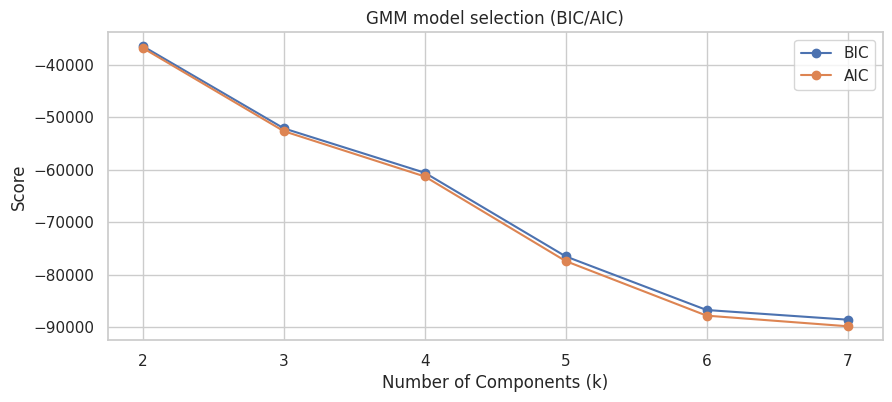

Best GMM components (by BIC): 7
GMM cluster counts: {np.int64(0): np.int64(977), np.int64(1): np.int64(1612), np.int64(2): np.int64(36), np.int64(3): np.int64(849), np.int64(4): np.int64(125), np.int64(5): np.int64(724), np.int64(6): np.int64(277)}

Cluster means (original scale):


0             1             2             3  \
price          6.111267e+05  4.895820e+05  3.054206e+06  4.068418e+05   
sqft_lot       8.577367e+03  9.812021e+03  3.109106e+04  8.021600e+03   
yr_renovated   6.821210e-13 -2.273737e-13  1.086457e+03  1.998916e+03   
sqft_living    2.357060e+03  2.054672e+03  5.377016e+03  1.576335e+03   
sqft_above     1.596244e+03  2.054672e+03  4.003436e+03  1.576335e+03   
sqft_basement  7.608161e+02 -5.684342e-14  1.373580e+03 -1.705303e-13   

                           4              5             6  
price          589810.967310  565494.505883  7.398197e+05  
sqft_lot        95328.678320    8238.963849  6.543723e+04  
yr_renovated     1204.719370    1997.994169  1.388418e+03  
sqft_living      2879.438656    2155.029080  2.744874e+03  
sqft_above       2038.040262    1415.800917  2.744874e+03  
sqft_basement     841.398394     739.228162  5.115908e-13

In [ ]:
from sklearn.mixture import GaussianMixture

# Gaussian Mixture: try range of components and evaluate by BIC/AIC
bics = []
aics = []
ks = range(2, 8)

for k in ks:
    gmm = GaussianMixture(n_components=k, random_state=1, n_init=3)
    gmm.fit(X_scaled)
    bics.append(gmm.bic(X_scaled))
    aics.append(gmm.aic(X_scaled))

# Plot BIC and AIC scores
plt.figure(figsize=(10,4))
plt.plot(ks, bics, '-o', label='BIC')
plt.plot(ks, aics, '-o', label='AIC')
plt.xlabel('Number of Components (k)')
plt.ylabel('Score')
plt.title('GMM model selection (BIC/AIC)')
plt.legend()
plt.show()

# Best model by minimum BIC
best_g = ks[np.argmin(bics)]
print("Best GMM components (by BIC):", best_g)

# Fit final GMM
gmm = GaussianMixture(n_components=best_g, random_state=1, n_init=5)
labels_gmm = gmm.fit_predict(X_scaled)

# Attach labels
X_gmm = X.copy()
X_gmm['cluster_gmm'] = labels_gmm

print("GMM cluster counts:", dict(zip(*np.unique(labels_gmm, return_counts=True))))

# Optional: cluster means (in original scale)
means = scaler.inverse_transform(gmm.means_)
means_df = pd.DataFrame(means, columns=clust_features)
print("\nCluster means (original scale):")
display(means_df.T)

In [ ]:
# IQR rule to flag rows that are outliers in one or more numeric columns
outlier_flags = pd.Series(False, index=df.index)

for c in numeric_cols:
    if df[c].notna().sum() == 0:
        continue  # skip empty columns
    q1 = df[c].quantile(0.25)
    q3 = df[c].quantile(0.75)
    iqr = q3 - q1
    lower = q1 - 1.5 * iqr
    upper = q3 + 1.5 * iqr
    mask = (df[c] < lower) | (df[c] > upper)
    outlier_flags = outlier_flags | mask

print("Rows flagged as outliers by 1.5*IQR in any numeric column:", outlier_flags.sum())

# Show a few flagged outliers
display(df[outlier_flags].head(10))

Rows flagged as outliers by 1.5*IQR in any numeric column: 1152


date      price  bedrooms  bathrooms  sqft_living  sqft_lot  \
1   02/05/14 0:00  2384000.0         5       2.50         3650      9050   
7   02/05/14 0:00   482000.0         4       2.50         2710     35868   
8   02/05/14 0:00   452500.0         3       2.50         2430     88426   
11  02/05/14 0:00  1400000.0         4       2.50         2920      4000   
14  02/05/14 0:00  1200000.0         5       2.75         2910      9480   
28  02/05/14 0:00   675000.0         5       2.50         2820     67518   
32  02/05/14 0:00   650000.0         4       2.00         1820      5000   
34  02/05/14 0:00   400000.0         4       2.50         3630     42884   
35  02/05/14 0:00   604000.0         3       2.50         3240     33151   
38  02/05/14 0:00   403000.0         3       2.00         1960     13100   

    floors waterfront  view  condition  sqft_above  sqft_basement  yr_built  \
1      2.0          0   4.0          5        3370            280      1921   
7      2.0          0   0.0          3        2710              0      1989   
8      1.0          0   0.0          4        1570            860      1985   
11     1.5          0   0.0          5        1910           1010      1909   
14     1.5          0   0.0          3        2910              0      1939   
28     2.0          0   0.0          3        2820              0      1979   
32     1.5          0   1.0          3        1640            180      1945   
34     1.5          0   0.0          3        2300           1330      1979   
35     2.0          0   2.0          3        3240              0      1995   
38     1.0          0   2.0          5        1650            310      1957   

    yr_renovated                    street           city  statezip country  \
1              0           709 W Blaine St        Seattle  WA 98119     USA   
7              0         23762 SE 253rd Pl   Maple Valley  WA 98038     USA   
8              0   46611-46625 SE 129th St     North Bend  WA 98045     USA   
11          1988     3838-4098 44th Ave NE        Seattle  WA 98105     USA   
14          1969          3534 46th Ave NE        Seattle  WA 98105     USA   
28          2014         23525 SE 32nd Way       Issaquah  WA 98029     USA   
32          2010     7201-7399 55th Ave NE        Seattle  WA 98115     USA   
34          2014  5172-5198 Heather Ave SE         Auburn  WA 98092     USA   
35             0          30822 36th Ct SW    Federal Way  WA 98023     USA   
38             0          17825 4th Ave SW  Normandy Park  WA 98166     USA   

    year        _ts  
1   2014 2014-02-05  
7   2014 2014-02-05  
8   2014 2014-02-05  
11  2014 2014-02-05  
14  2014 2014-02-05  
28  2014 2014-02-05  
32  2014 2014-02-05  
34  2014 2014-02-05  
35  2014 2014-02-05  
38  2014 2014-02-05

In [ ]:
from sklearn.neighbors import LocalOutlierFactor
from sklearn.cluster import DBSCAN

# LOF anomaly detection
if len(X_scaled) >= 20:
    lof = LocalOutlierFactor(n_neighbors=20, contamination=0.02)  # tune contamination
    lof_labels = lof.fit_predict(X_scaled)
    # LOF: -1 = outlier, 1 = inlier
    outlier_by_lof = (lof_labels == -1)
    print("LOF outliers count:", outlier_by_lof.sum())

    # Attach to dataset
    X_loc = X.copy()
    X_loc['lof_outlier'] = outlier_by_lof
    display(X_loc[X_loc['lof_outlier']].head(10))

# DBSCAN anomaly detection
if len(X_scaled) >= 20:
    db = DBSCAN(eps=0.5, min_samples=5)  # tune eps/min_samples
    db_labels = db.fit_predict(X_scaled)

    # Count noise points (-1 = outlier/noise)
    n_noise = list(db_labels).count(-1)
    print("DBSCAN noise points:", n_noise)

    # Attach to dataset
    X_db = X.copy()
    X_db['dbscan_label'] = db_labels
    display(X_db[X_db['dbscan_label'] == -1].head(10))

LOF outliers count: 92


price  sqft_lot  yr_renovated  sqft_living  sqft_above  \
83    410000.0     36704          2000         1800        1360   
122  2280000.0    307752             0        13540        9410   
214   675000.0     36478          1994          930         930   
333   295000.0     89298          2013         2200        1100   
359  1500000.0     12757             0         2430        1340   
363   230000.0      6000          1969          950         790   
375   330000.0    435600             0         1550        1550   
447   252500.0      6127          2012         1030         880   
478  1200000.0      8078             0         1560        1560   
772   765000.0     14275             0         3580        3190   

     sqft_basement  lof_outlier  
83             440         True  
122           4130         True  
214              0         True  
333           1100         True  
359           1090         True  
363            160         True  
375              0         True  
447            150         True  
478              0         True  
772            390         True

DBSCAN noise points: 443


price  sqft_lot  yr_renovated  sqft_living  sqft_above  \
1    2384000.0      9050             0         3650        3370   
8     452500.0     88426             0         2430        1570   
28    675000.0     67518          2014         2820        2820   
34    400000.0     42884          2014         3630        2300   
56    491500.0    125452          1997         2190        2190   
62    625000.0     54014             0         2730        1560   
74    900000.0     77972          1954         1330        1330   
107  1090000.0    141570             0         4340        4340   
113   525888.0     71874             0         2550        1810   
122  2280000.0    307752             0        13540        9410   

     sqft_basement  dbscan_label  
1              280            -1  
8              860            -1  
28               0            -1  
34            1330            -1  
56               0            -1  
62            1170            -1  
74               0            -1  
107              0            -1  
113            740            -1  
122           4130            -1

In [ ]:
# Attach cluster labels back to the main dataframe (only for rows used in clustering)
df_clusters = df.copy()

df_clusters.loc[X.index, 'cluster_km'] = labels_km
df_clusters.loc[X.index, 'cluster_agg'] = labels_agg
df_clusters.loc[X.index, 'cluster_gmm'] = labels_gmm

# --- Cluster summaries ---

# KMeans summary
print("\nKMeans cluster summary (mean values of selected features):")
display(df_clusters.groupby('cluster_km')[clust_features].mean().T)

print("KMeans cluster counts:")
display(df_clusters['cluster_km'].value_counts())

# Agglomerative summary
print("\nAgglomerative cluster summary (mean values of selected features):")
display(df_clusters.groupby('cluster_agg')[clust_features].mean().T)

print("Agglomerative cluster counts:")
display(df_clusters['cluster_agg'].value_counts())

# GMM summary
print("\nGMM cluster summary (mean values of selected features):")
display(df_clusters.groupby('cluster_gmm')[clust_features].mean().T)

print("GMM cluster counts:")
display(df_clusters['cluster_gmm'].value_counts())

# --- Save cluster centers (KMeans only, since others don’t have centroids) ---
df_clusters.groupby('cluster_km')[clust_features].mean().to_csv('cluster_km_centers.csv')
print("\nSaved KMeans cluster centers to cluster_km_centers.csv in runtime.")


KMeans cluster summary (mean values of selected features):


cluster_km               0.0            1.0            2.0            3.0  \
price          663672.824166  638780.845770  598527.673873  371376.617060   
sqft_lot        13979.327323  248587.537313   11064.646694    8836.071429   
yr_renovated        0.000000     597.701493    1996.188017    1995.717391   
sqft_living      2846.044383    3052.985075    2415.225207    1350.673913   
sqft_above       2821.796117    2780.522388    1483.510331    1249.618012   
sqft_basement      24.248266     272.462687     931.714876     101.055901   

cluster_km               4.0         5.0            6.0           7.0  \
price          382671.036085  19744500.0  594293.663645  1.593714e+06   
sqft_lot         8459.359488      9593.5   11385.911814  2.642423e+04   
yr_renovated        0.000000      1000.5       0.000000  5.747301e+02   
sqft_living      1503.733387      1685.0    2453.126456  4.862546e+03   
sqft_above       1420.990392      1365.0    1531.400998  3.783319e+03   
sqft_basement      82.742994       320.0     921.725458  1.079227e+03   

cluster_km               8.0  
price          676931.367714  
sqft_lot        17179.164265  
yr_renovated     1988.046110  
sqft_living      2773.115274  
sqft_above       2722.942363  
sqft_basement      50.172911

KMeans cluster counts:


cluster_km
4.0    1249
3.0     966
0.0     721
6.0     601
2.0     484
8.0     347
7.0     163
1.0      67
5.0       2
Name: count, dtype: int64


Agglomerative cluster summary (mean values of selected features):


cluster_agg             0.0            1.0            2.0            3.0  \
price          1.150417e+06  613902.732239  823058.834447  549959.711358   
sqft_lot       1.642917e+04  256073.114754   18299.399645   20896.469027   
yr_renovated   9.239840e+02     590.770492      95.412078    1910.719027   
sqft_living    3.787941e+03    2930.655738    3142.793961    2444.373894   
sqft_above     2.599056e+03    2641.885246    3137.607460    2409.108407   
sqft_basement  1.188886e+03     288.770492       5.186501      35.265487   

cluster_agg           4.0            5.0            6.0            7.0  \
price          26590000.0  381593.656434  527232.522570  492348.612125   
sqft_lot           7793.0    7960.233408    9826.856902    8513.776536   
yr_renovated          0.0       0.000000       0.000000    1996.262570   
sqft_living        1180.0    1602.353468    2233.680135    2015.610801   
sqft_above         1180.0    1549.313945    1416.099327    1316.597765   
sqft_basement         0.0      53.039523     817.580808     699.013035   

cluster_agg              8.0  
price          357313.161980  
sqft_lot         8421.425185  
yr_renovated     1995.241481  
sqft_living      1191.977778  
sqft_above       1162.437037  
sqft_basement      29.540741

Agglomerative cluster counts:


cluster_agg
5.0    1341
8.0     675
6.0     594
2.0     563
7.0     537
3.0     452
0.0     376
1.0      61
4.0       1
Name: count, dtype: int64


GMM cluster summary (mean values of selected features):


cluster_gmm              0.0            1.0           2.0            3.0  \
price          612380.055684  489829.000047  3.185693e+06  407555.465899   
sqft_lot         8578.142272    9864.733251  3.178978e+04    8043.885748   
yr_renovated        0.000000       0.000000  1.050611e+03    1998.922261   
sqft_living      2358.970317    2054.812035  5.502222e+03    1578.563015   
sqft_above       1598.530194    2054.812035  4.072222e+03    1578.563015   
sqft_basement     760.440123       0.000000  1.430000e+03       0.000000   

cluster_gmm           4.0            5.0            6.0  
price          596412.854  566282.695203  743286.207724  
sqft_lot        94107.928    8239.770718   66194.956679  
yr_renovated     1216.336    1998.030387    1393.772563  
sqft_living      2876.312    2158.984807    2754.516245  
sqft_above       2038.192    1418.128453    2754.516245  
sqft_basement     838.120     740.856354       0.000000

GMM cluster counts:


cluster_gmm
1.0    1612
0.0     977
3.0     849
5.0     724
6.0     277
4.0     125
2.0      36
Name: count, dtype: int64


Saved KMeans cluster centers to cluster_km_centers.csv in runtime.


##**Phase III**

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
from sklearn.model_selection import train_test_split, cross_val_score, RandomizedSearchCV
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.decomposition import PCA
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
import plotly.express as px
pd.set_option("display.max_columns", 100)
sns.set()

In [2]:
url = "https://raw.githubusercontent.com/salemprakash/EDA/main/Data/house%20price.csv"
df = pd.read_csv(url)
df.head()

date      price  bedrooms  bathrooms  sqft_living  sqft_lot  \
0  02/05/14 0:00   313000.0         3       1.50         1340      7912   
1  02/05/14 0:00  2384000.0         5       2.50         3650      9050   
2  02/05/14 0:00   342000.0         3       2.00         1930     11947   
3  02/05/14 0:00   420000.0         3       2.25         2000      8030   
4  02/05/14 0:00   550000.0         4       2.50         1940     10500   

   floors waterfront  view  condition  sqft_above  sqft_basement  yr_built  \
0     1.5          0   0.0          3        1340              0      1955   
1     2.0          0   4.0          5        3370            280      1921   
2     1.0          0   0.0          4        1930              0      1966   
3     1.0          0   0.0          4        1000           1000      1963   
4     1.0          0   0.0          4        1140            800      1976   

   yr_renovated                    street       city  statezip country  
0          2005      18810 Densmore Ave N  Shoreline  WA 98133     USA  
1             0           709 W Blaine St    Seattle  WA 98119     USA  
2             0  26206-26214 143rd Ave SE       Kent  WA 98042     USA  
3             0           857 170th Pl NE   Bellevue  WA 98008     USA  
4          1992         9105 170th Ave NE    Redmond  WA 98052     USA

In [3]:
print(df.shape)
print(df.dtypes)
print(df.isna().sum())
print(df.duplicated().sum())

(4600, 18)
date              object
price            float64
bedrooms           int64
bathrooms        float64
sqft_living        int64
sqft_lot           int64
floors           float64
waterfront        object
view             float64
condition          int64
sqft_above         int64
sqft_basement      int64
yr_built           int64
yr_renovated       int64
street            object
city              object
statezip          object
country           object
dtype: object
date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       4
view             1
condition        0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
street           0
city             0
statezip         0
country          1
dtype: int64
0


In [4]:
df['date'] = pd.to_datetime(df['date'], format='%m/%d/%y %H:%M', errors='coerce')
df['year'] = df['date'].dt.year
df['month'] = df['date'].dt.month
df['day'] = df['date'].dt.day
df[['state','zipcode']] = df['statezip'].str.extract(r'([A-Z]{2})\s*(\d+)')
df['zipcode'] = pd.to_numeric(df['zipcode'], errors='coerce')
df.drop(columns=['street','country','statezip'], inplace=True)
df['log_price'] = np.log1p(df['price'])
df = df.dropna(subset=['price','sqft_living'])
df = df.drop_duplicates()
Q1 = df['price'].quantile(0.01)
Q3 = df['price'].quantile(0.99)
df = df[(df['price']>=Q1)&(df['price']<=Q3)]
df.reset_index(drop=True, inplace=True)
df.head()

date     price  bedrooms  bathrooms  sqft_living  sqft_lot  floors  \
0 2014-02-05  313000.0         3       1.50         1340      7912     1.5   
1 2014-02-05  342000.0         3       2.00         1930     11947     1.0   
2 2014-02-05  420000.0         3       2.25         2000      8030     1.0   
3 2014-02-05  550000.0         4       2.50         1940     10500     1.0   
4 2014-02-05  490000.0         2       1.00          880      6380     1.0   

  waterfront  view  condition  sqft_above  sqft_basement  yr_built  \
0          0   0.0          3        1340              0      1955   
1          0   0.0          4        1930              0      1966   
2          0   0.0          4        1000           1000      1963   
3          0   0.0          4        1140            800      1976   
4          0   0.0          3         880              0      1938   

   yr_renovated       city    year  month  day state  zipcode  log_price  
0          2005  Shoreline  2014.0    2.0  5.0    WA    98133  12.653962  
1             0       Kent  2014.0    2.0  5.0    WA    98042  12.742569  
2             0   Bellevue  2014.0    2.0  5.0    WA    98008  12.948012  
3          1992    Redmond  2014.0    2.0  5.0    WA    98052  13.217675  
4          1994    Seattle  2014.0    2.0  5.0    WA    98115  13.102163

In [5]:
num_cols = ['bedrooms','bathrooms','sqft_living','sqft_lot','floors','waterfront','view','condition','sqft_above','sqft_basement','yr_built','yr_renovated','zipcode','year','month','day']
cat_cols = ['city','state']
for c in num_cols:
    if c in df.columns:
        df[c] = pd.to_numeric(df[c], errors='coerce')
df[cat_cols] = df[cat_cols].fillna('Unknown')
df[num_cols] = df[num_cols].fillna(df[num_cols].median())
df.describe().T

count                           mean                  min  \
date             2050  2014-06-21 13:43:57.658536704  2014-01-06 00:00:00   
price          4554.0                  523011.968521                  0.0   
bedrooms       4554.0                       3.391085                  0.0   
bathrooms      4554.0                       2.144433                  0.0   
sqft_living    4554.0                    2110.180281                370.0   
sqft_lot       4554.0                   14751.833333                638.0   
floors         4554.0                       1.509003                  1.0   
waterfront     4554.0                        0.00549                  0.0   
view           4554.0                       0.226614                  0.0   
condition      4554.0                       3.451032                  1.0   
sqft_above     4554.0                    1805.884058                370.0   
sqft_basement  4554.0                     304.296223                  0.0   
yr_built       4554.0                    1970.783707               1900.0   
yr_renovated   4554.0                     808.895916                  0.0   
year           4554.0                         2014.0               2014.0   
month          4554.0                       6.775143                  1.0   
day            4554.0                       6.014054                  5.0   
zipcode        4554.0                   98079.538867              98001.0   
log_price      4554.0                      12.906368                  0.0   

                               25%                  50%                  75%  \
date           2014-03-07 00:00:00  2014-07-05 00:00:00  2014-09-06 00:00:00   
price                     320000.0             459250.0             648000.0   
bedrooms                       3.0                  3.0                  4.0   
bathrooms                     1.75                 2.25                  2.5   
sqft_living                 1460.0               1970.0               2600.0   
sqft_lot                    5000.0               7650.0              10900.0   
floors                         1.0                  1.5                  2.0   
waterfront                     0.0                  0.0                  0.0   
view                           0.0                  0.0                  0.0   
condition                      3.0                  3.0                  4.0   
sqft_above                  1190.0               1587.0               2280.0   
sqft_basement                  0.0                  0.0                600.0   
yr_built                    1951.0               1976.0               1997.0   
yr_renovated                   0.0                  0.0               1999.0   
year                        2014.0               2014.0               2014.0   
month                          7.0                  7.0                  7.0   
day                            6.0                  6.0                  6.0   
zipcode                    98033.0              98072.0              98117.0   
log_price                12.676079            13.037352            13.381648   

                               max            std  
date           2014-12-06 00:00:00            NaN  
price                    2005000.0  294389.577744  
bedrooms                       9.0       0.902747  
bathrooms                     6.25       0.757032  
sqft_living                 8020.0     894.534417  
sqft_lot                 1074218.0   35745.567308  
floors                         3.5       0.537958  
waterfront                     1.0       0.073897  
view                           4.0       0.751912  
condition                      5.0       0.675832  
sqft_above                  8020.0     823.922736  
sqft_basement               2850.0     447.280171  
yr_built                    2014.0      29.689313  
yr_renovated                2014.0     979.474203  
year                        2014.0            0.0  
month                         12.0       2

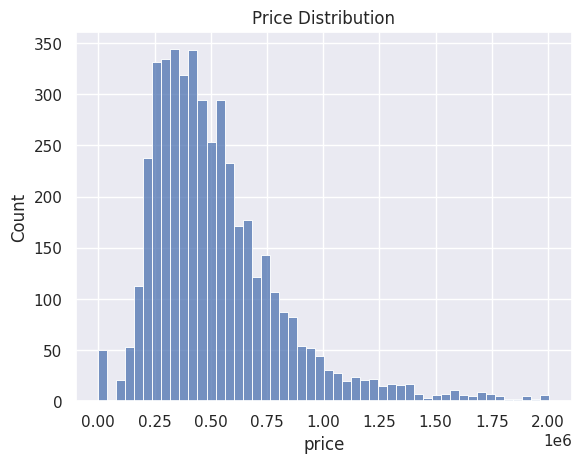

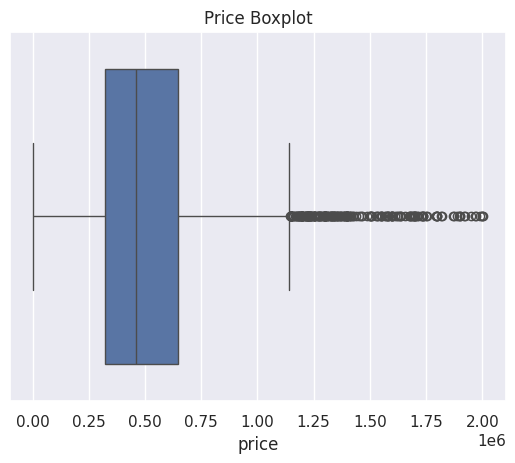

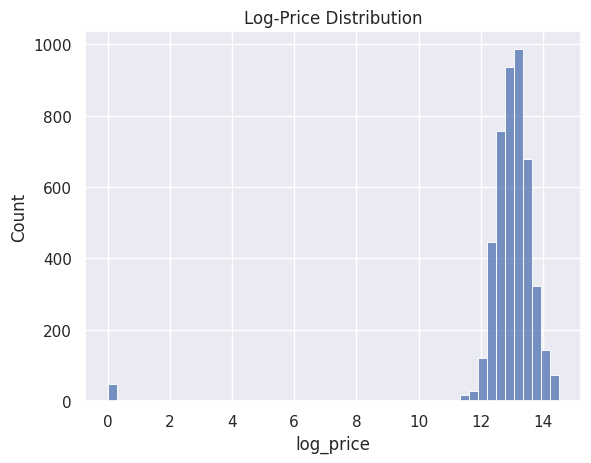

In [6]:
fig, ax = plt.subplots()
sns.histplot(df['price'], bins=50, ax=ax)
plt.title('Price Distribution')
plt.show()

fig, ax = plt.subplots()
sns.boxplot(x=df['price'], ax=ax)
plt.title('Price Boxplot')
plt.show()

fig, ax = plt.subplots()
sns.histplot(df['log_price'], bins=50, ax=ax)
plt.title('Log-Price Distribution')
plt.show()

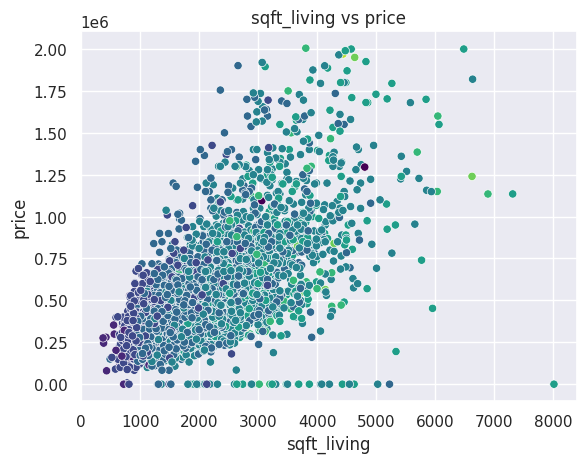

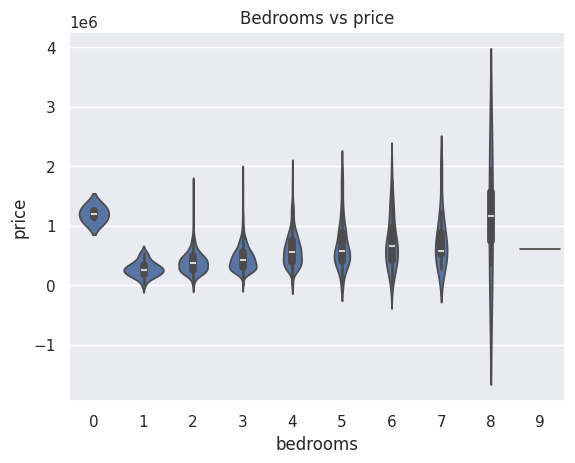

In [7]:
fig, ax = plt.subplots()
sns.scatterplot(data=df, x='sqft_living', y='price', hue='bedrooms', palette='viridis', ax=ax, legend=False)
plt.title('sqft_living vs price')
plt.show()

fig, ax = plt.subplots()
sns.violinplot(data=df, x='bedrooms', y='price', ax=ax)
plt.title('Bedrooms vs price')
plt.show()

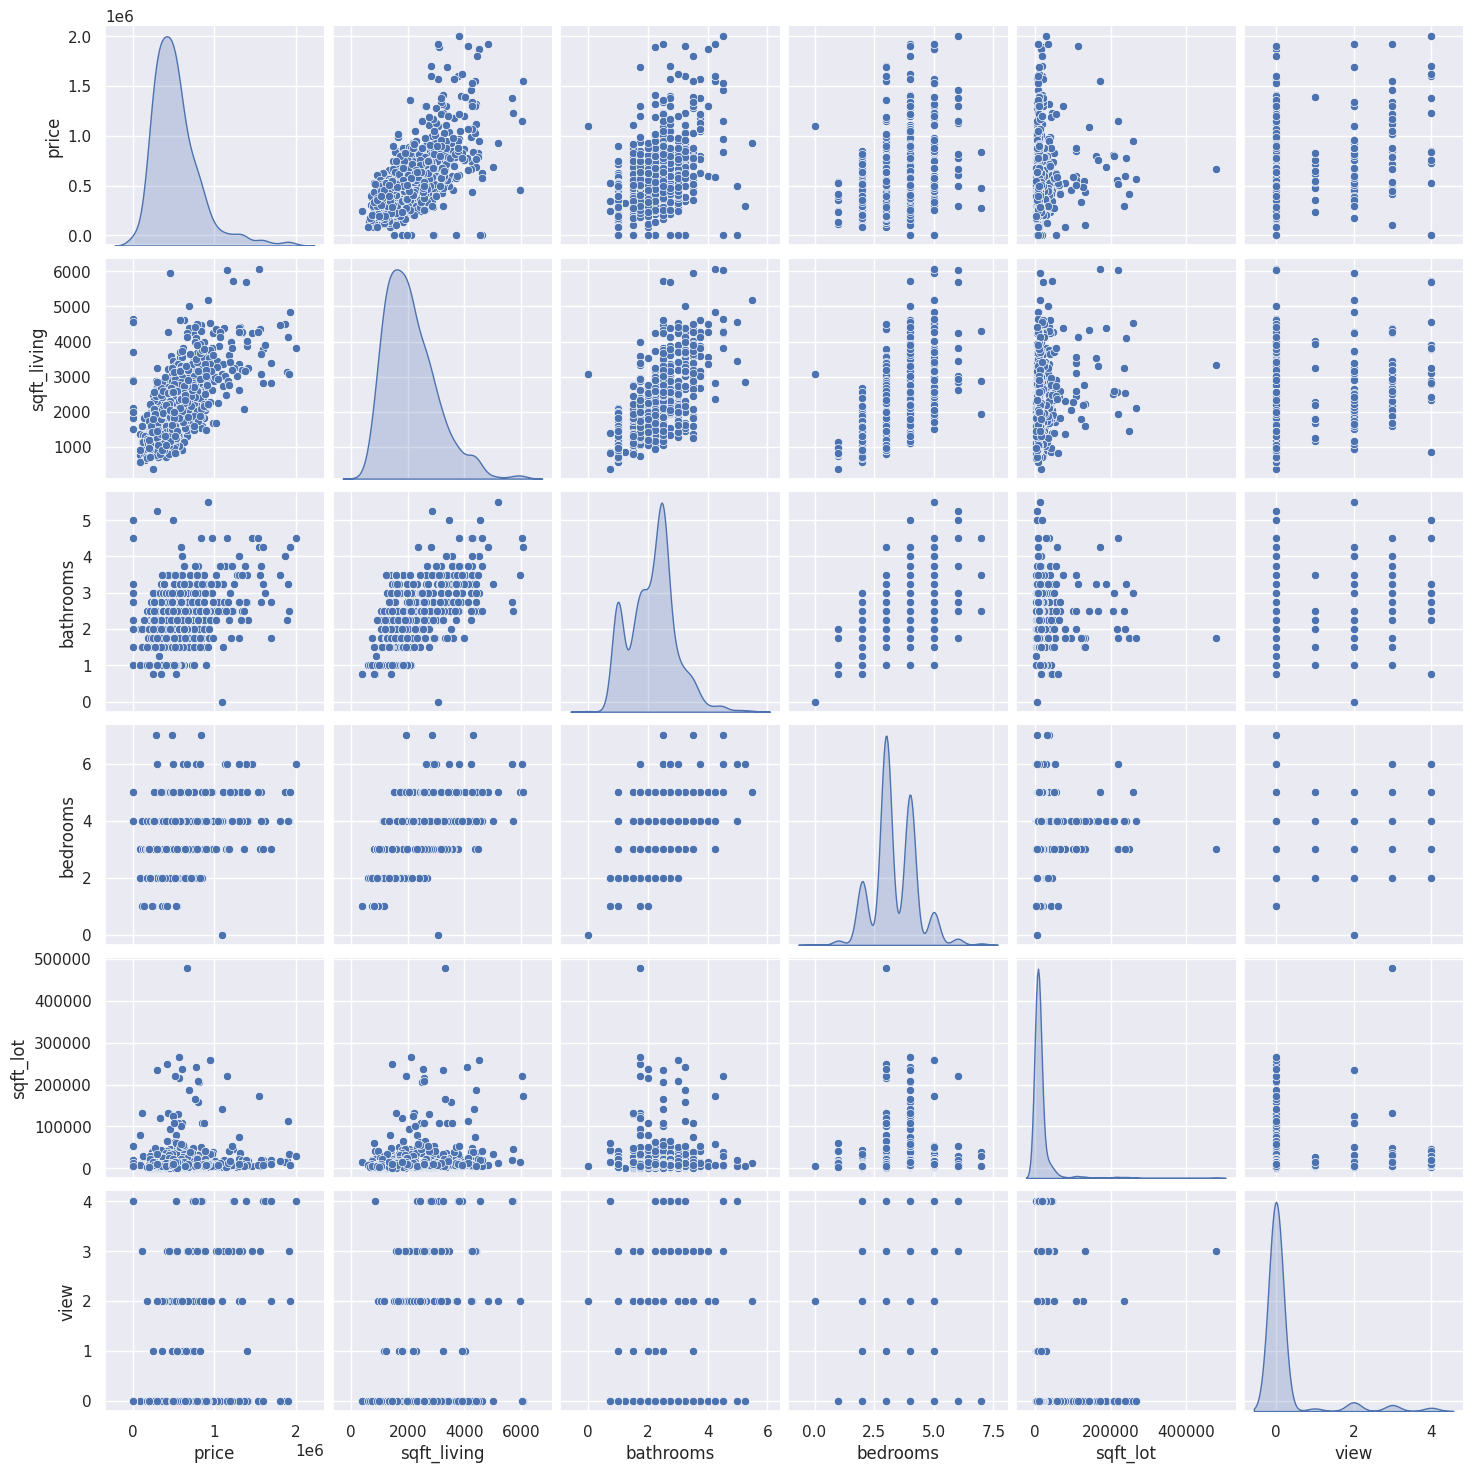

In [8]:
cols = ['price','sqft_living','bathrooms','bedrooms','sqft_lot','view']
sns.pairplot(df[cols].sample(min(1000, len(df))), diag_kind='kde')
plt.show()

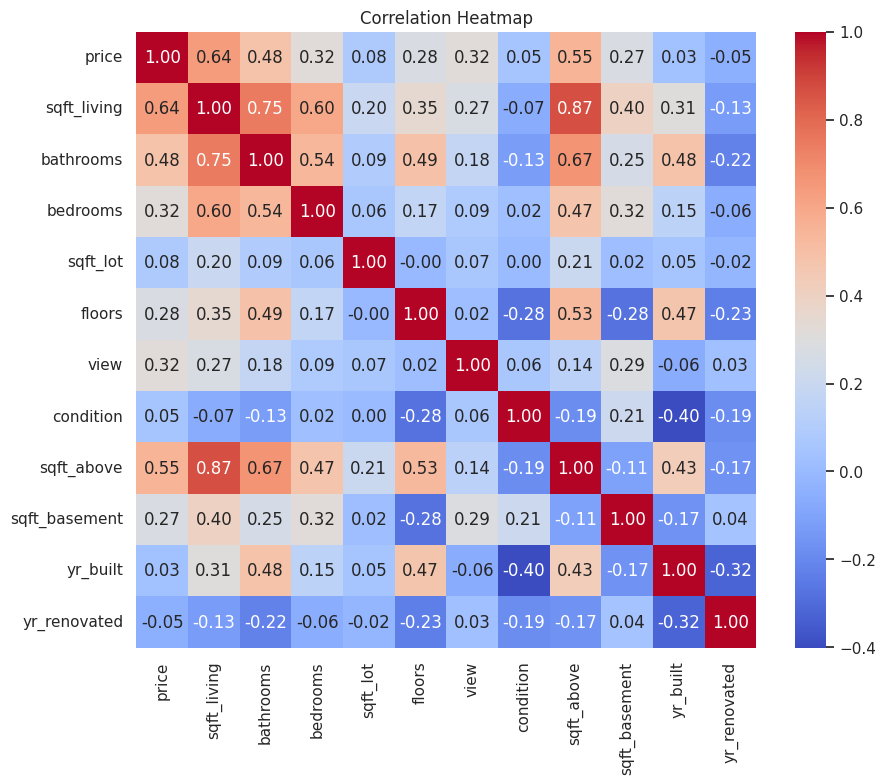

In [9]:
corr = df[['price','sqft_living','bathrooms','bedrooms','sqft_lot','floors','view','condition','sqft_above','sqft_basement','yr_built','yr_renovated']].corr(numeric_only=True)
plt.figure(figsize=(10,8))
sns.heatmap(corr, annot=True, fmt=".2f", cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

In [10]:
ts = df.dropna(subset=['date']).groupby(pd.Grouper(key='date', freq='M'))['price'].mean().reset_index()
fig = px.line(ts, x='date', y='price', title='Average Price Over Time (Monthly)')
fig.show()

/tmp/ipython-input-3848657419.py:1: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  ts = df.dropna(subset=['date']).groupby(pd.Grouper(key='date', freq='M'))['price'].mean().reset_index()


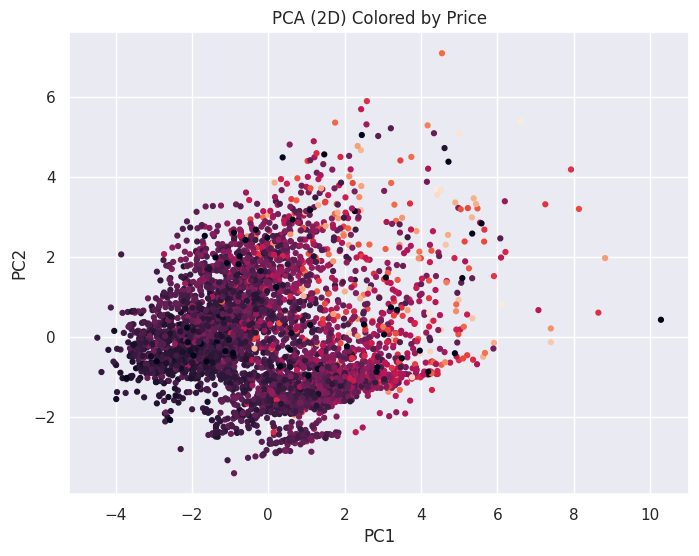

[0.33709107 0.17684425]


In [12]:
pca_features = ['sqft_living','bathrooms','bedrooms','sqft_lot','floors','view','condition','sqft_above','sqft_basement','yr_built','yr_renovated']
X_pca = df[pca_features].copy()
X_pca = X_pca.fillna(X_pca.median())
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_pca)
pca = PCA(n_components=2, random_state=42)
X_pca_2d = pca.fit_transform(X_scaled)
pca_df = pd.DataFrame(X_pca_2d, columns=['PC1','PC2'])
pca_df['price'] = df['price'].values
plt.figure(figsize=(8,6))
plt.scatter(pca_df['PC1'], pca_df['PC2'], c=pca_df['price'], s=12)
plt.title('PCA (2D) Colored by Price')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.show()
print(pca.explained_variance_ratio_)

In [13]:
target = 'price'
features = num_cols + cat_cols
features = [f for f in features if f in df.columns and f != target]
X = df[features].copy()
y = df[target].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [16]:
num_feats = [c for c in X.columns if c not in cat_cols]
cat_feats = cat_cols
preprocess = ColumnTransformer([
    ('num', StandardScaler(), num_feats),
    ('cat', OneHotEncoder(handle_unknown='ignore', sparse_output=False), cat_feats)
])
models = {
    'LinearRegression': LinearRegression(),
    'Ridge': Ridge(alpha=1.0, random_state=42),
    'RandomForest': RandomForestRegressor(n_estimators=300, random_state=42, n_jobs=-1),
    'GradientBoosting': GradientBoostingRegressor(random_state=42)
}
results = {}
for name, mdl in models.items():
    pipe = Pipeline([('prep', preprocess), ('model', mdl)])
    pipe.fit(X_train, y_train)
    preds = pipe.predict(X_test)
    rmse = mean_squared_error(y_test, preds) ** 0.5
    mae = mean_absolute_error(y_test, preds)
    r2 = r2_score(y_test, preds)
    cv = cross_val_score(pipe, X_train, y_train, cv=5, scoring='r2')
    results[name] = {'RMSE': rmse, 'MAE': mae, 'R2': r2, 'CV_R2_Mean': cv.mean()}
pd.DataFrame(results).T.sort_values('RMSE')


RMSE            MAE        R2  CV_R2_Mean
GradientBoosting  169901.091458  106822.224616  0.658405    0.632173
LinearRegression  170503.934201  109749.456677  0.655977    0.607000
Ridge             170706.997113  109958.957424  0.655157    0.610697
RandomForest      174078.379370  104972.397634  0.641402    0.628151

In [17]:
rf_pipe = Pipeline([('prep', preprocess), ('model', RandomForestRegressor(random_state=42, n_jobs=-1))])
param_dist = {
    'model__n_estimators': [200,300,400,500,700],
    'model__max_depth': [None,10,15,20,30],
    'model__min_samples_split': [2,5,10],
    'model__min_samples_leaf': [1,2,4],
    'model__max_features': ['auto','sqrt',0.5]
}
rand_cv = RandomizedSearchCV(rf_pipe, param_distributions=param_dist, n_iter=25, cv=5, scoring='neg_root_mean_squared_error', n_jobs=-1, random_state=42, verbose=1)
rand_cv.fit(X_train, y_train)
best_model = rand_cv.best_estimator_
best_params = rand_cv.best_params_
best_params, rand_cv.best_score_


Fitting 5 folds for each of 25 candidates, totalling 125 fits


/usr/local/lib/python3.12/dist-packages/sklearn/model_selection/_validation.py:528: FitFailedWarning:


40 fits failed out of a total of 125.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
6 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.12/dist-packages/sklearn/model_selection/_validation.py", line 866, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.12/dist-packages/sklearn/base.py", line 1389, in wrapper
    return fit_method(estimator, *args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.12/dist-packages/sklearn/pipeline.py", line 662, in fit
    self._final_estimator.fit(Xt, y, **l

({'model__n_estimators': 500,
  'model__min_samples_split': 5,
  'model__min_samples_leaf': 1,
  'model__max_features': 0.5,
  'model__max_depth': 30},
 np.float64(-179294.44835273066))

{'RMSE': 173567.51101992957, 'MAE': 106648.84376938659, 'R2': 0.6435033173858115}


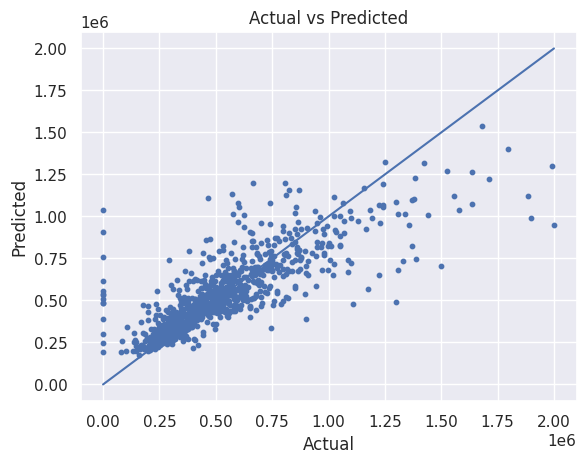

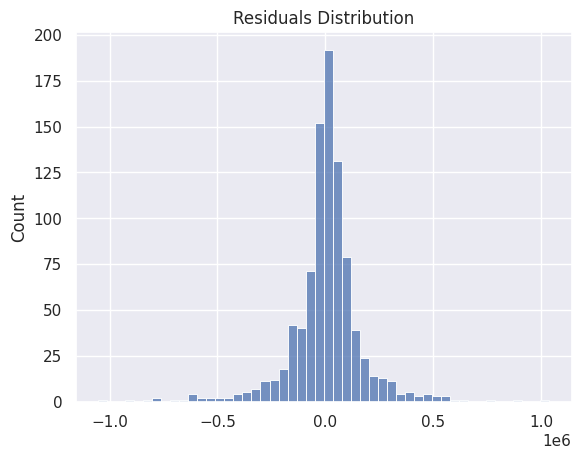

In [20]:
preds = best_model.predict(X_test)
rmse = mean_squared_error(y_test, preds) ** 0.5
mae = mean_absolute_error(y_test, preds)
r2 = r2_score(y_test, preds)

print({'RMSE': rmse, 'MAE': mae, 'R2': r2})

plt.figure()
plt.scatter(y_test, preds, s=10)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()])
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Actual vs Predicted')
plt.show()

residuals = preds - y_test
plt.figure()
sns.histplot(residuals, bins=50)
plt.title('Residuals Distribution')
plt.show()



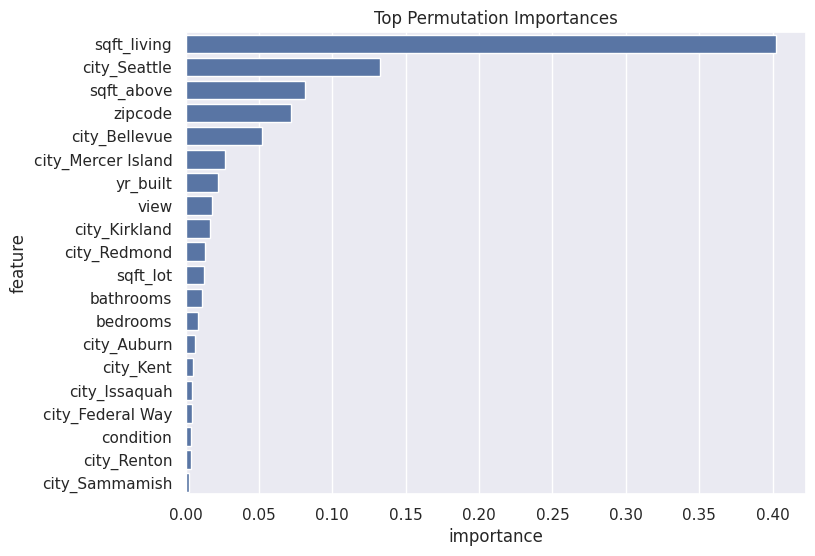

feature  importance
2          sqft_living    0.402350
50        city_Seattle    0.132595
8           sqft_above    0.081710
12             zipcode    0.071752
18       city_Bellevue    0.052243
38  city_Mercer Island    0.027066
10            yr_built    0.022302
6                 view    0.017832
34       city_Kirkland    0.016609
46        city_Redmond    0.012978
3             sqft_lot    0.012863
1            bathrooms    0.011444
0             bedrooms    0.008715
17         city_Auburn    0.006527
33           city_Kent    0.005178
31       city_Issaquah    0.004529
29    city_Federal Way    0.004499
7            condition    0.003887
47         city_Renton    0.003701
48      city_Sammamish    0.002531

In [22]:
from sklearn.inspection import permutation_importance


model = best_model.named_steps['model']
preprocessor = best_model.named_steps['prep']


X_test_pre = preprocessor.transform(X_test)


num_features = preprocessor.named_transformers_['num'].get_feature_names_out(num_feats)
cat_features = preprocessor.named_transformers_['cat'].get_feature_names_out(cat_feats)
all_feature_names = list(num_features) + list(cat_features)


perm = permutation_importance(model, X_test_pre, y_test, n_repeats=5, random_state=42, scoring='r2', n_jobs=-1)


imp = pd.DataFrame({
    'feature': all_feature_names[:len(perm.importances_mean)],
    'importance': perm.importances_mean
}).sort_values('importance', ascending=False).head(20)


plt.figure(figsize=(8,6))
sns.barplot(data=imp, x='importance', y='feature')
plt.title('Top Permutation Importances')
plt.show()

imp.head(20)


In [23]:
import joblib
joblib.dump(best_model, 'best_house_price_model.joblib')


['best_house_price_model.joblib']